# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', 90)
#sns.set_style('darkgrid')

import scipy
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import BayesianRidge, Ridge, OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error
from pycaret.regression import *

import optuna
from lightgbm import LGBMRegressor
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.linear_model import BayesianRidge, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor

# Importing dataset

In [2]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
sample_submission

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

# EDA

In [6]:
# Data overview
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Missing values 
train0.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
test0.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Inference:
From above you can infer that there are few values which are missing in test set but not in training set. Also in few features some categories are not present in training set but present in test. 

To avoid this issue I'll combine train and test features together one on another, perform cleaning and FE on combined data and at the separate train and test set, perform modeling on training set and prediction on test set 

## Combining train and  test

In [9]:
target = train0.SalePrice  # Stroring dependent/target column
test_ids = test0.Id        # Storing id, it will help to partition into train and test again at later point

train1 = train0.drop(['Id', 'SalePrice'], axis = 1) # Droping column
test1 = test0.drop('Id', axis=1)

data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)  # Concatinating train and test into 1 dataset
data1.head() 

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [10]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Cleaning...

In [11]:
data2 = data1.copy()

### Ensure proper datatype

In [12]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

### Fill Categorical Missing Values

In [13]:
# Impute using a constant value
# Features where "NA" doesn't mean missing value it was just an another category of data
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna("None")

# Impute using the column mode
# Features where "NA" actually means a missing value
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [14]:
data3 = data2.copy()

### Handling Numeric Missing Values

In [15]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)                                  # Extrating all numeric feature
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns  # Selecting columns with no missing values
    
    # Selecting all rows which has no missing value in passed feature "na_target"
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target] 
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    
    # Rows which actually have missing value is taken as X_est for prediction
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()                   # Initializing regressor
    knn.fit(X_train, y_train)                     # Fitting to the train data
    
    y_pred = knn.predict(X_test)                  # Predicting missing values
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred # replacing those numeric missing values with predicted values
    
    return df

In [16]:
num_features = data3.select_dtypes(np.number) # Storing numeric freatures
for column in num_features.columns[num_features.isnull().any()]: # Iterating over features with any missing values
    data3 = knn_impute(data3, column)                # calling function for each column having missing value

In [17]:
# All the missing values has been handled. There is no feature left with any missing values.
data3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [18]:
data4 = data3.copy()

# Feature Engineering

In [19]:
# It's difficult to decide new features without domain knowledge. 
# I have created these sounded relevant to me and it worked.
# However, it's very good to take advise from domain experts and from others works.

data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [20]:
data5 = data4.copy()

# Feature Transformation...

### Log Transform for Skewed Features

In [21]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

Feature       Skew  Absolute Skew  Skewed
0          LotFrontage   1.340751       1.340751    True
1              LotArea  12.822431      12.822431    True
2          OverallQual   0.197110       0.197110   False
3          OverallCond   0.570312       0.570312    True
4            YearBuilt  -0.599806       0.599806    True
5         YearRemodAdd  -0.451020       0.451020   False
6           MasVnrArea   2.603682       2.603682    True
7           BsmtFinSF1   1.425516       1.425516    True
8           BsmtFinSF2   4.146111       4.146111    True
9            BsmtUnfSF   0.919322       0.919322    True
10         TotalBsmtSF   1.162806       1.162806    True
11            1stFlrSF   1.469604       1.469604    True
12            2ndFlrSF   0.861675       0.861675    True
13        LowQualFinSF  12.088761      12.088761    True
14           GrLivArea   1.269358       1.269358    True
15        BsmtFullBath   0.624373       0.624373    True
16        BsmtHalfBath   3.931594       3.931594    True
17            FullBath   0.167606       0.167606   False
18            HalfBath   0.694566       0.694566    True
19        BedroomAbvGr   0.326324       0.326324   False
20        KitchenAbvGr   4.302254       4.302254    True
21        TotRmsAbvGrd   0.758367       0.758367    True
22          Fireplaces   0.733495       0.733495    True
23         GarageYrBlt  -0.346327       0.346327   False
24          GarageCars  -0.218593       0.218593   False
25          GarageArea   0.240896       0.240896   False
26          WoodDeckSF   1.842433       1.842433    True
27         OpenPorchSF   2.535114       2.535114    True
28       EnclosedPorch   4.003891       4.003891    True
29           3SsnPorch  11.376065      11.376065    True
30         ScreenPorch   3.946694       3.946694    True
31            PoolArea  16.898328      16.898328    True
32             MiscVal  21.947195      21.947195    True
33              MoSold   0.195884       0.195884   False
34              YrSold   0.132399       0.132399   False
35         SqFtPerRoom   0.893992       0.893992    True
36  Total_Home_Quality  -0.564123       0.564123    True
37     Total_Bathrooms   0.493402       0.493402   False
38          HighQualSF   1.252036       1.252036    True

In [22]:
# From above table you can see there are many skewed features. 
# However most of the algorithms works well when data is normally distribted.
# So our task is to transform skewed data into normal distributed data. And do that we have to perform log transform as below.

for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])
    
# So the question is why log1p and not just log ?
# It's because log is not defined at 0. However when you looked at the data there are few rows which has value as 0. 
# To avoid -inf and as precaution I am using log1p.

### Cosine Transform for Cyclical Features



MoSold contains month number. We can't use this column as it is because our algorithm treat month number 12 as greater than month 1, which is not true. Months are cyclic in nature where month 1 and 12 are close to each other whereas month 6 is farther in terms of climatic condition. 

Price of house may differ based on climatic condition or say temperature. As we all know jan and december have less temperature whereas mid months have higher temperature. Therefore, here I will be transforming MoSold into cosine transformed feature. 

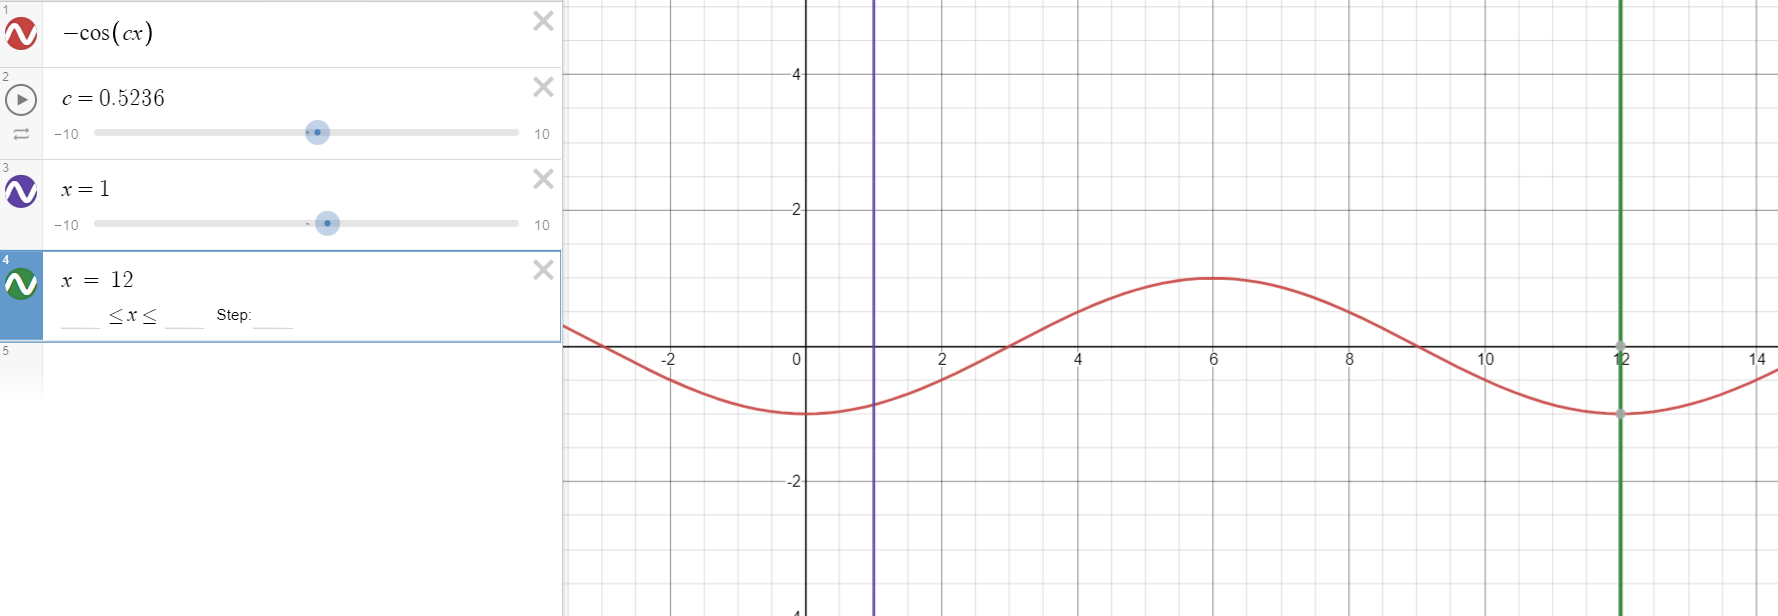


From above image you can see month 1 and 12 have lower value (minimum) whereas month 6 value is maximum which is valid.

In [23]:
data5['MoSold'] = (-np.cos(0.5236 * data5['MoSold'])) # transforming to cosine values

In [24]:
data6 = data5.copy()

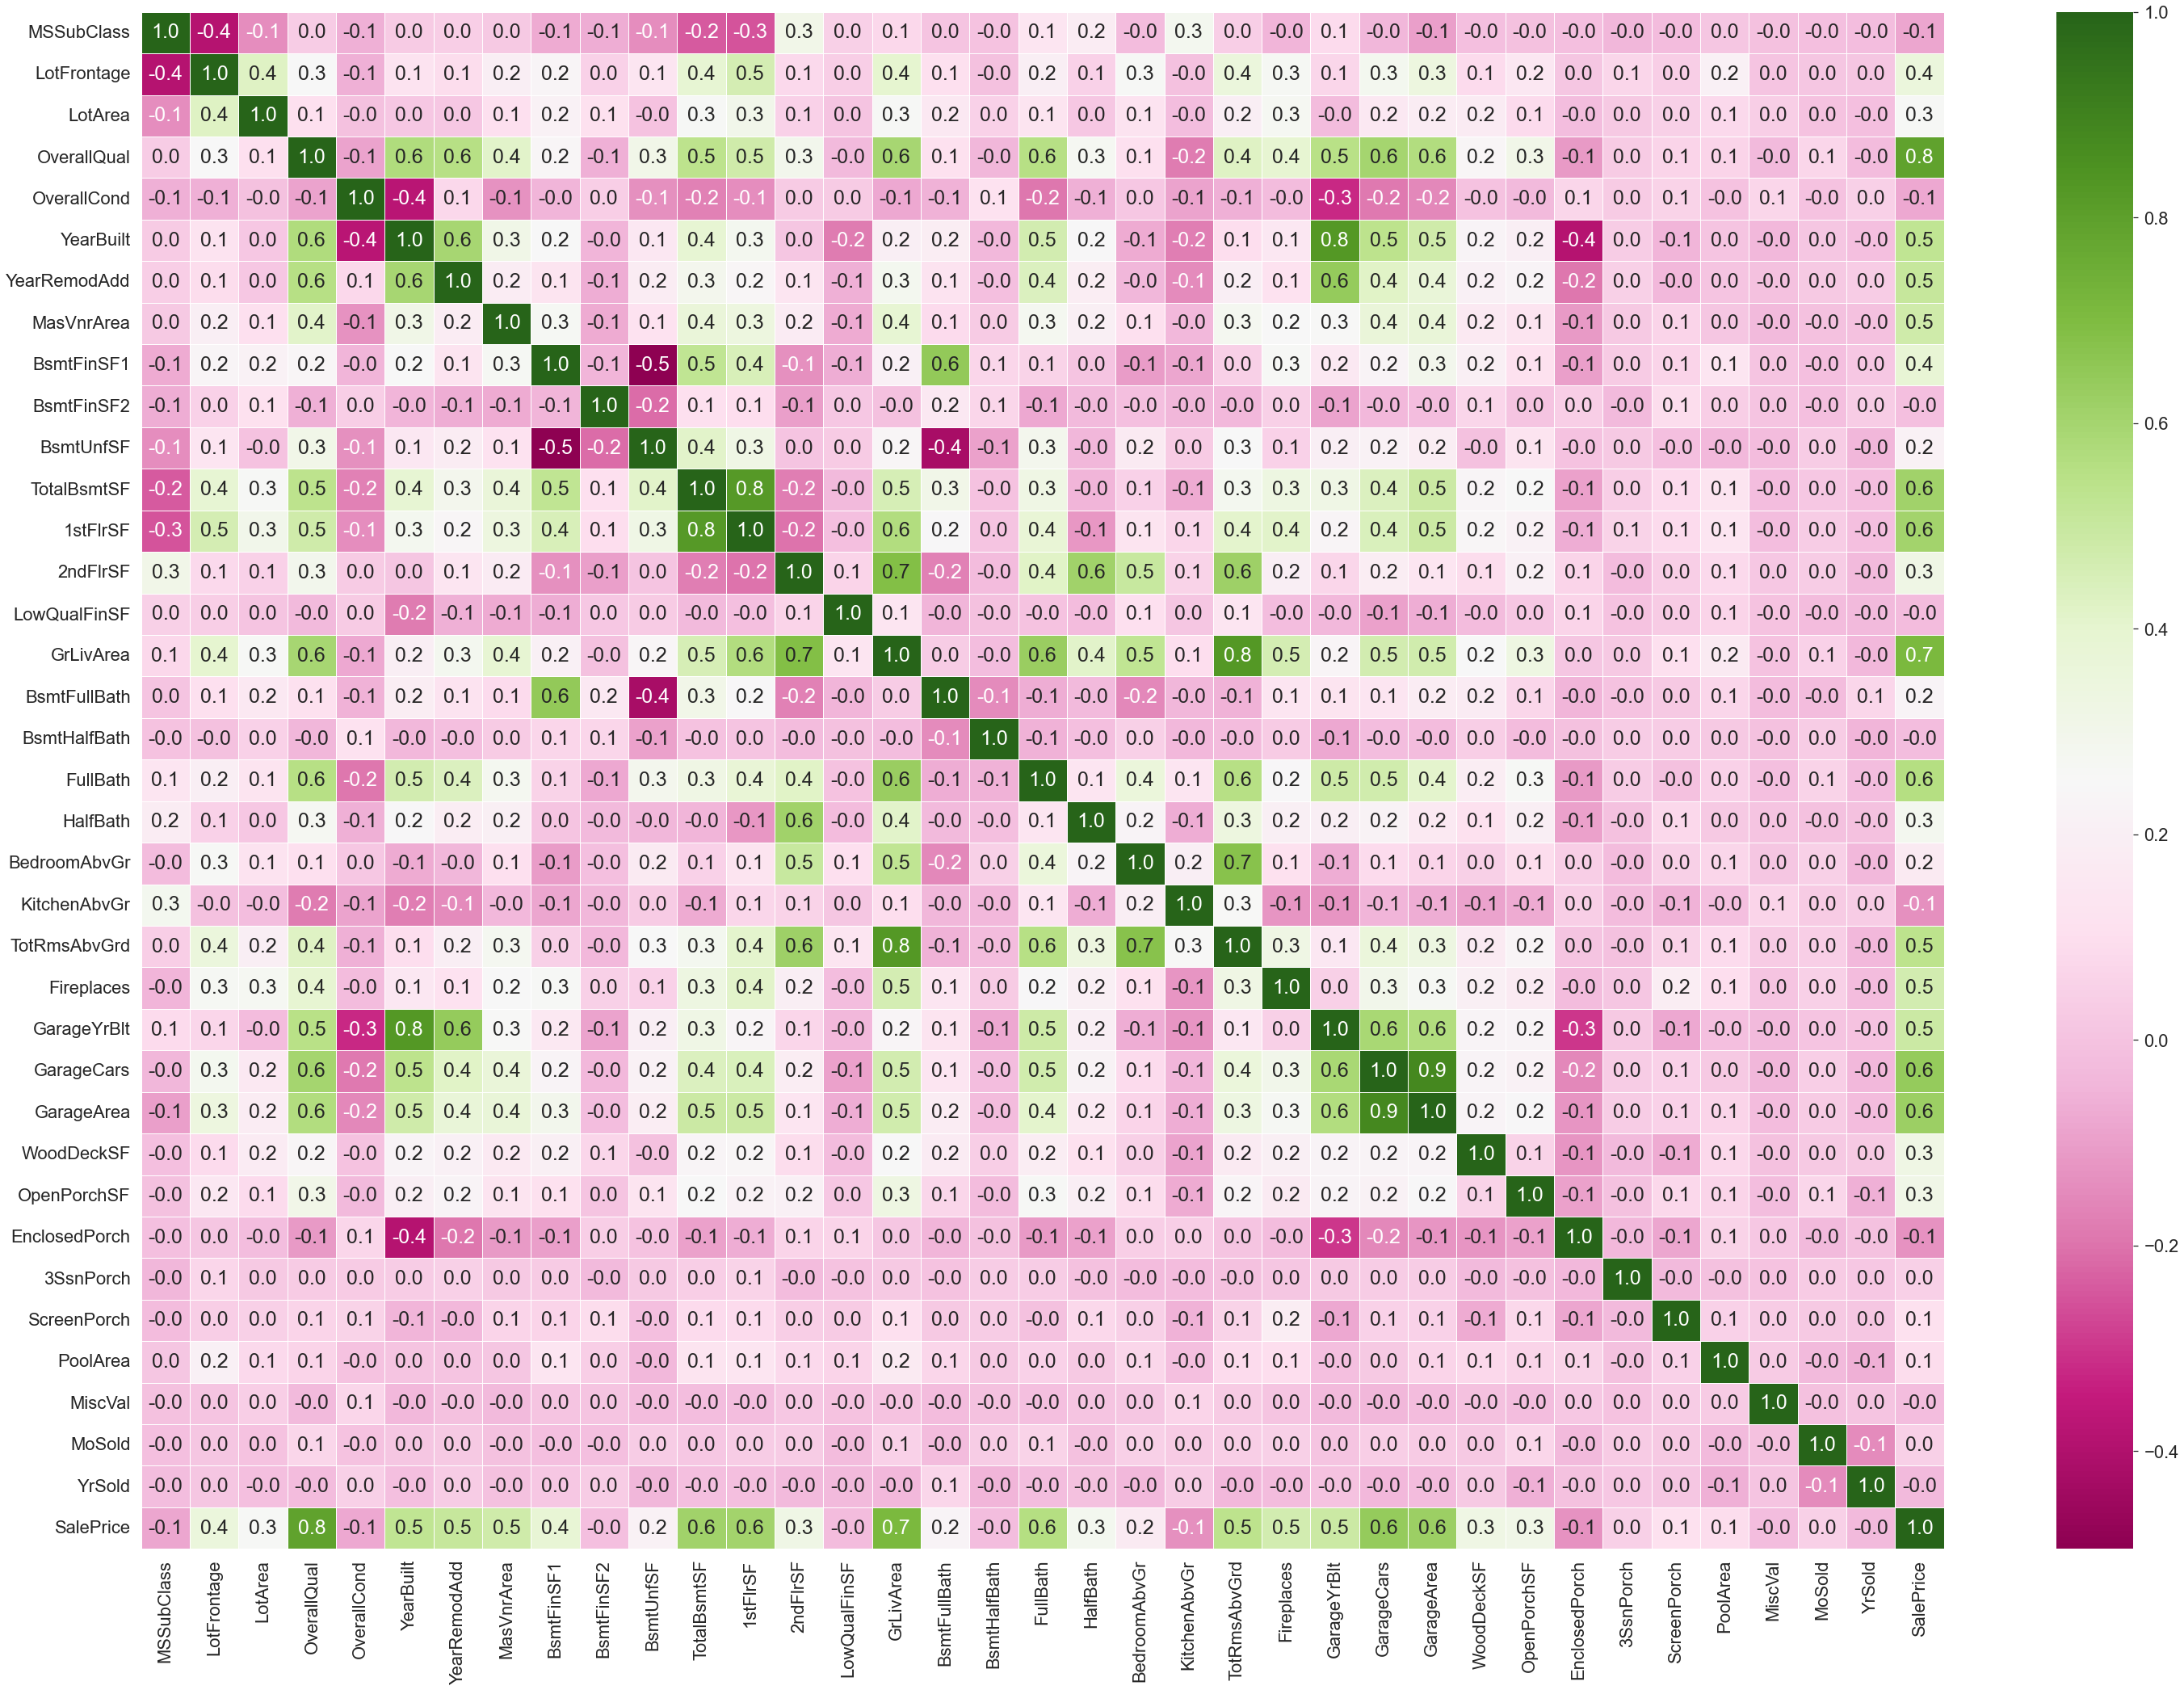

In [25]:
correlation_train=train0.drop(['Id'], axis = 1).corr()
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [26]:
correlation_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Inference:
In above heatmap we can see very less number of features are highly correlated like "GarageCars" and "GarageArea". 
We can drop highly dependent features but here I'm not dropping any features as we are dealing with less number of features.

## Visualizing less dependent or say independent features

In [27]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if abs(value<=0.8):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

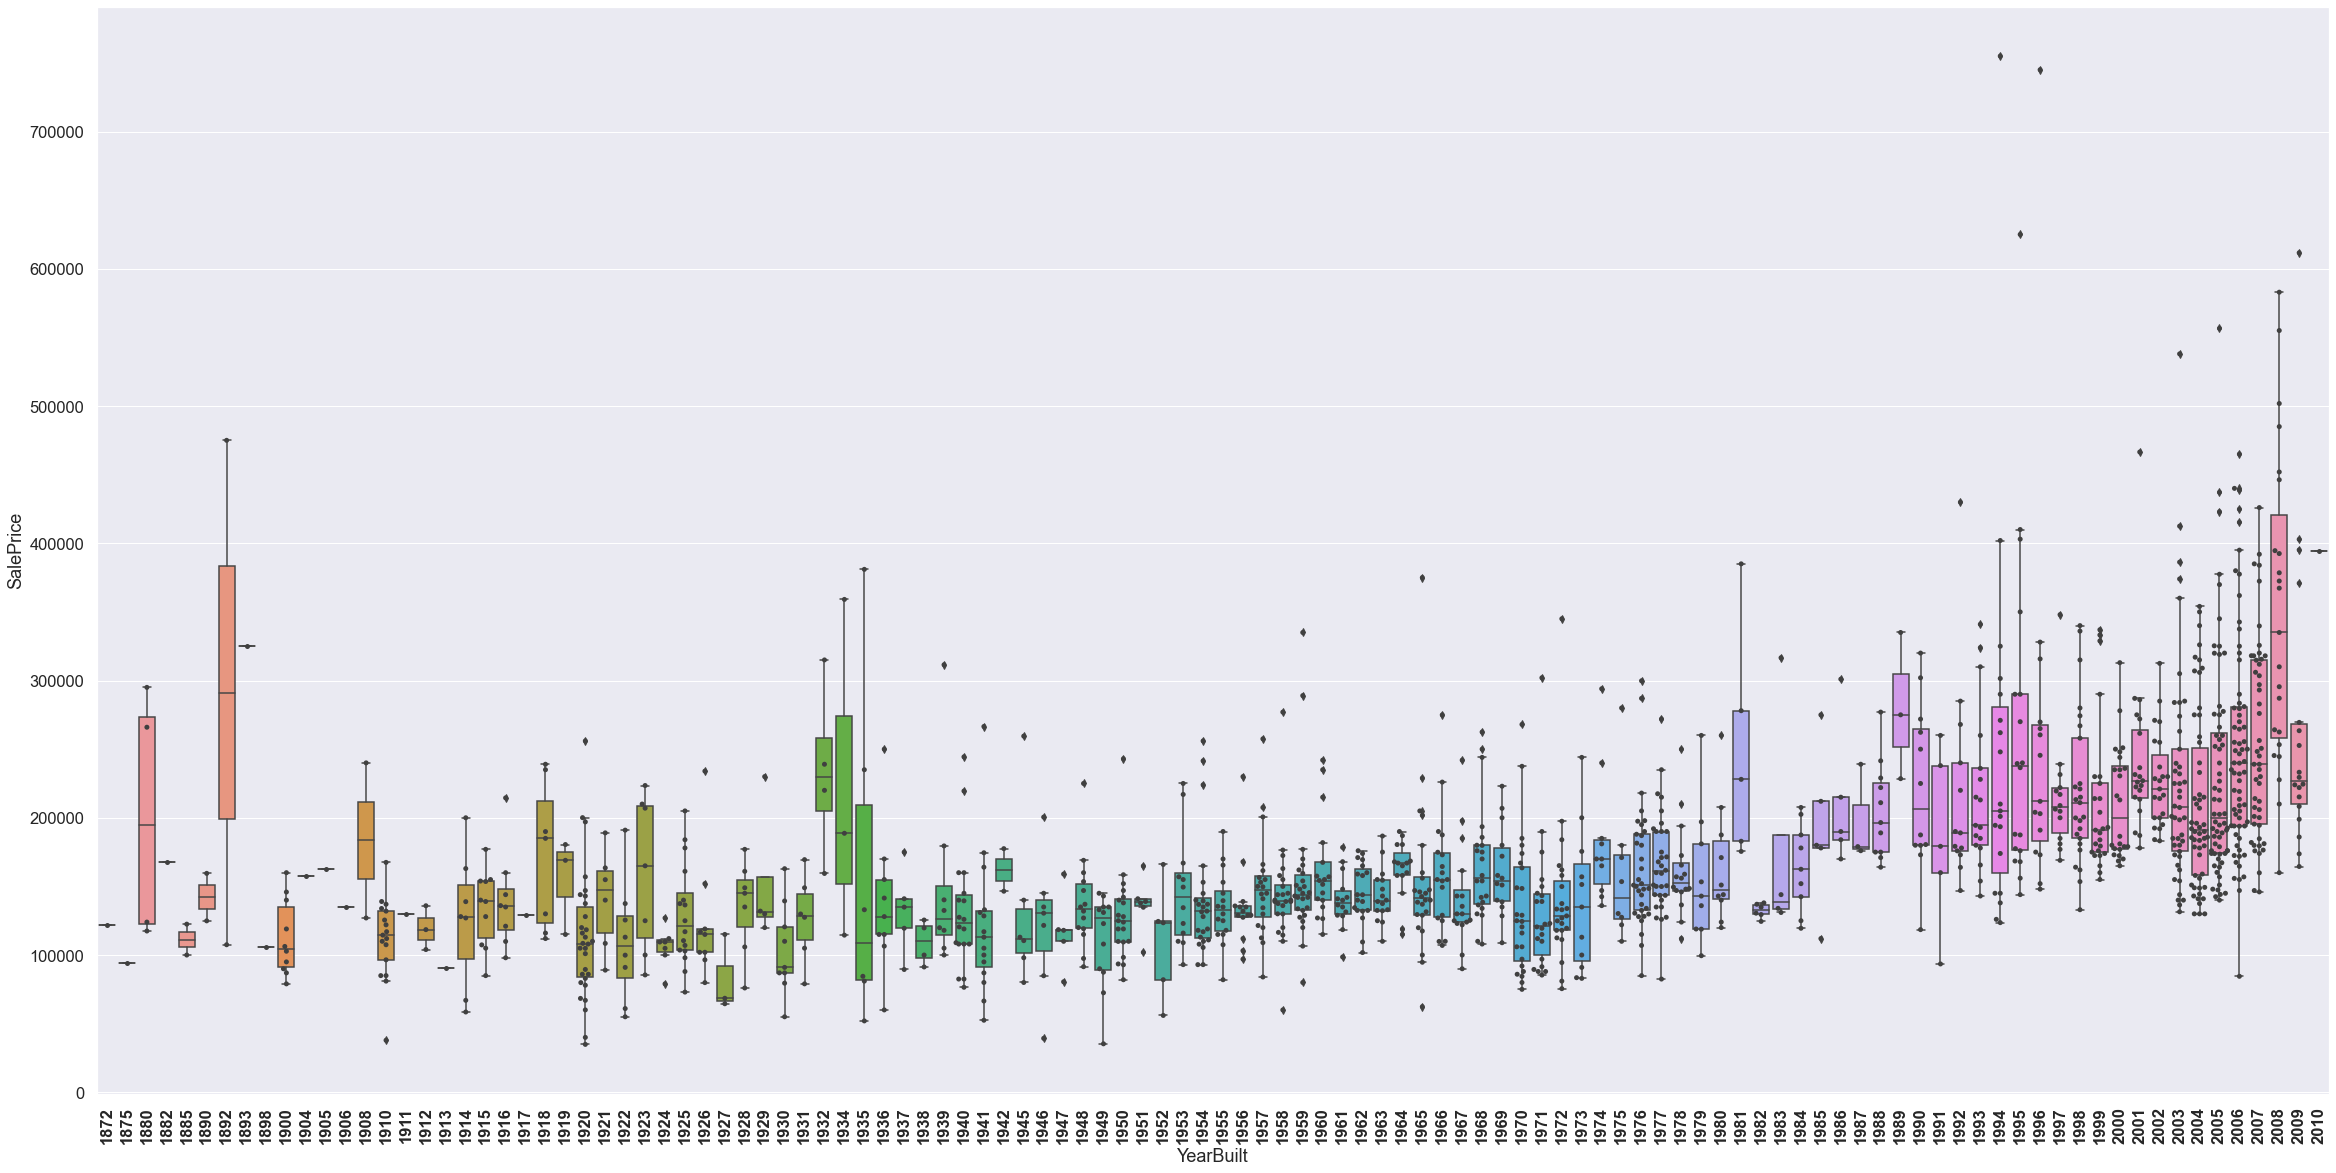

In [28]:
plt.figure(figsize=(40,20))
sns.set(font_scale=1.5)
sns.boxplot(x='YearBuilt', y="SalePrice", data=train0, )
sns.swarmplot(x='YearBuilt', y="SalePrice", data=train0, color=".25")
plt.xticks(weight='bold',rotation=90)
plt.show()


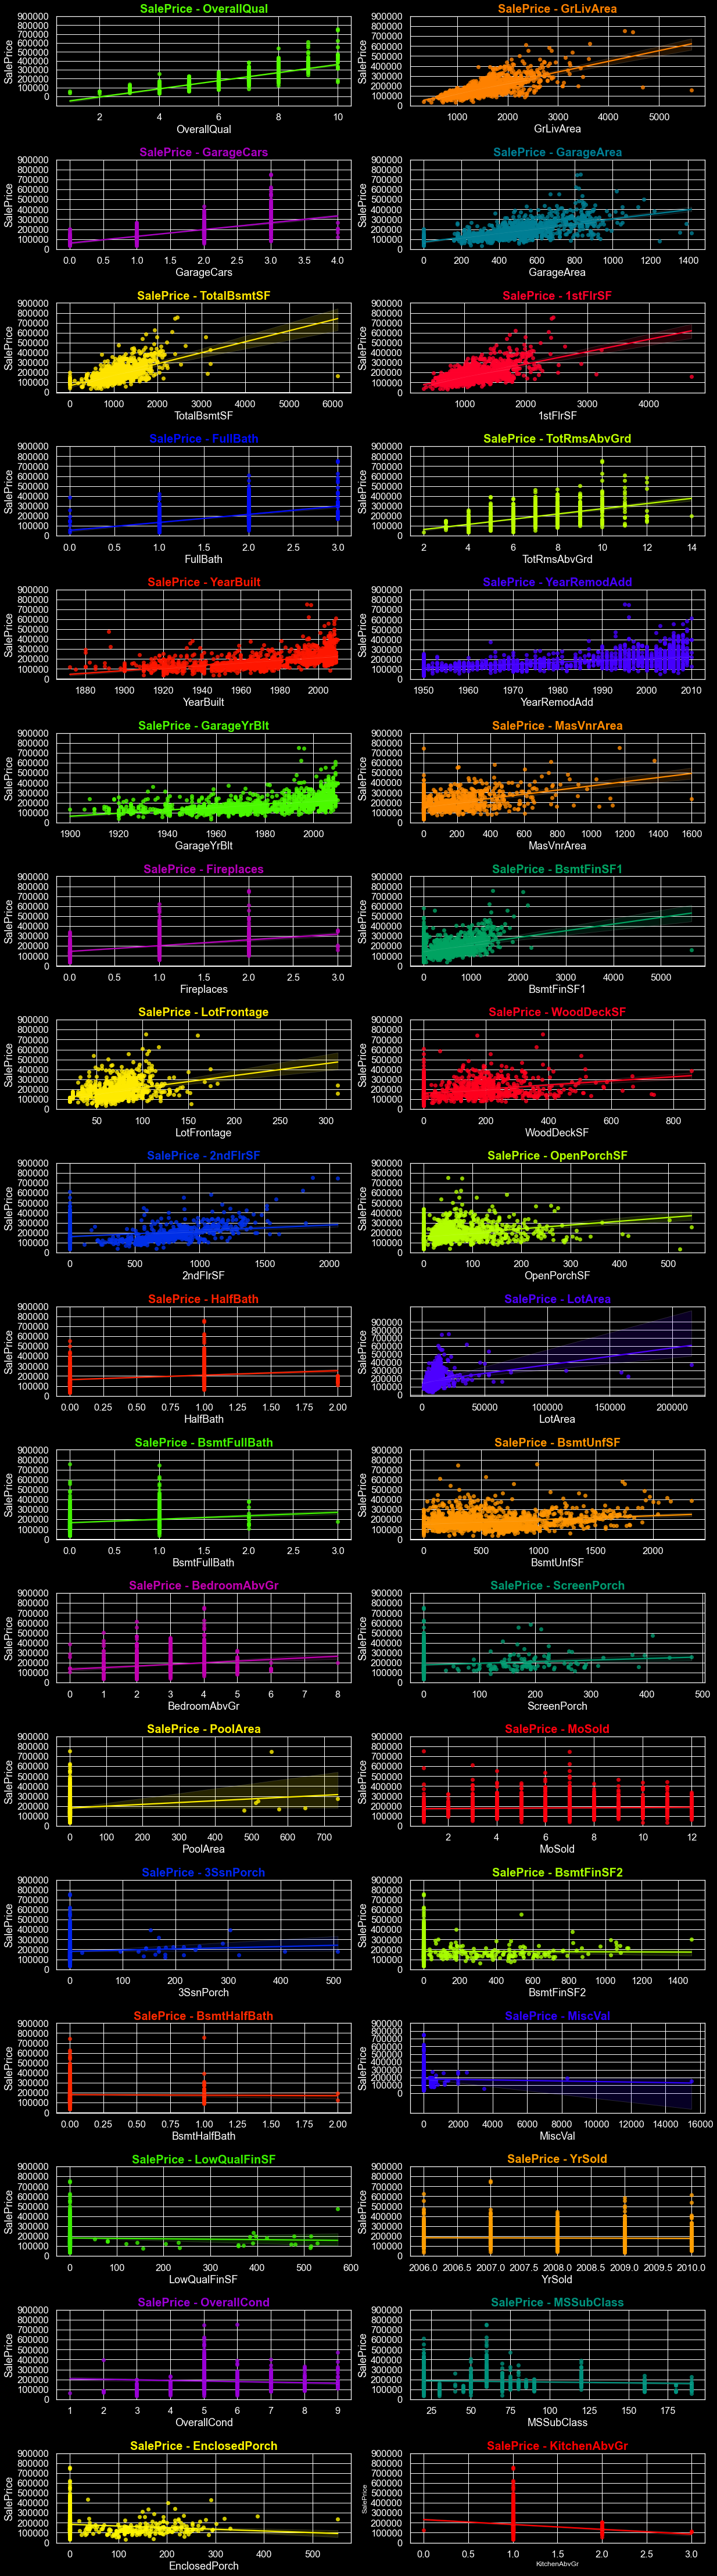

In [29]:


plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(important_columns))]
for i,ax,color in zip(important_columns,axes.flatten(),colors):
    sns.regplot(x=train0[i], y=train0["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)



From above plots we can see data is spread linealy

# Encoding Categorical features

In [30]:
data6 = pd.get_dummies(data6)
data7 = data6.copy()

In [31]:
data7

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        4.189655  9.042040            7     1.791759   7.602900   
1        4.394449  9.169623            6     2.197225   7.589336   
2        4.234107  9.328212            7     1.791759   7.601902   
3        4.110874  9.164401            7     1.791759   7.557995   
4        4.442651  9.565284            8     1.791759   7.601402   
...           ...       ...          ...          ...        ...   
2914     3.091042  7.568896            4     2.079442   7.586296   
2915     3.091042  7.546974            4     1.791759   7.586296   
2916     5.081404  9.903538            5     2.079442   7.581210   
2917     4.143135  9.253591            5     1.791759   7.597396   
2918     4.317488  9.172431            7     1.791759   7.597898   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003    5.283204    6.561031         0.0   5.017280   
1             1976    0.000000    6.886532         0.0   5.652489   
2             2002    5.093750    6.188264         0.0   6.075346   
3             1970    0.000000    5.379897         0.0   6.293419   
4             2000    5.860786    6.486161         0.0   6.196444   
...            ...         ...         ...         ...        ...   
2914          1970    0.000000    0.000000         0.0   6.304449   
2915          1970    0.000000    5.533389         0.0   5.686975   
2916          1996    0.000000    7.110696         0.0   0.000000   
2917          1992    0.000000    5.823046         0.0   6.356108   
2918          1994    4.553877    6.632002         0.0   5.476464   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        6.753438  6.753438  6.751101           0.0   7.444833      0.693147   
1        7.141245  7.141245  0.000000           0.0   7.141245      0.000000   
2        6.825460  6.825460  6.765039           0.0   7.488294      0.693147   
3        6.629363  6.869014  6.629363           0.0   7.448916      0.693147   
4        7.044033  7.044033  6.960348           0.0   7.695758      0.693147   
...           ...       ...       ...           ...        ...           ...   
2914     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2915     6.304449  6.304449  6.304449           0.0   6.996681      0.000000   
2916     7.110696  7.110696  0.000000           0.0   7.110696      0.693147   
2917     6.816736  6.878326  0.000000           0.0   6.878326      0.000000   
2918     6.904751  6.904751  6.912743           0.0   7.601402      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0         0.000000         2  0.693147             3      0.693147   
1         0.693147         2  0.000000             3      0.693147   
2         0.000000         2  0.693147             3      0.693147   
3         0.000000         1  0.000000             3      0.693147   
4         0.000000         2  0.693147             4      0.693147   
...            ...       ...       ...           ...           ...   
2914      0.000000         1  0.693147             3      0.693147   
2915      0.000000         1  0.693147             3      0.693147   
2916      0.000000         1  0.000000             4      0.693147   
2917      0.693147         1  0.000000             3      0.693147   
2918      0.000000         2  0.693147             3      0.693147   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         2.197225    0.000000       2003.0         2.0       548.0   
1         1.945910    0.693147       1976.0         2.0       460.0   
2         1.945910    0.693147       2001.0         2.0       608.0   
3         2.079442    0.693147       1998.0         3.0       642.0   
4         2.302585    0.693147       2000.0         3.0       836.0   
...            ...         ...          ...         ...         ...   
2914      1.791759    0.000000       1973.8         0.0      

In [32]:
scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)
data7.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.064176 -0.103719     0.646183    -0.435439   1.040634      0.896833   
1     0.536077  0.146544    -0.063185     1.906370   0.161526     -0.395604   
2     0.066112  0.457629     0.646183    -0.435439   0.975922      0.848965   
3    -0.295084  0.136301     0.646183    -0.435439  -1.869638     -0.682812   
4     0.677357  0.922662     1.355551    -0.435439   0.943542      0.753229   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0    1.210174    0.783229   -0.363076  -0.326949     0.017291 -0.777287   
1   -0.804554    0.892444   -0.363076   0.013428     0.347150  0.424865   
2    1.137926    0.658154   -0.363076   0.240016     0.078551 -0.554028   
3   -0.804554    0.386923   -0.363076   0.356870    -0.088244 -0.419015   
4    1.430432    0.758108   -0.363076   0.304906     0.264464  0.123520   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  1.196876     -0.116932   0.564627      1.135609     -0.251544  0.781366   
1 -0.863610     -0.116932  -0.370371     -0.835139      3.888856  0.781366   
2  1.201129     -0.116932   0.698477      1.135609     -0.251544  0.781366   
3  1.159720     -0.116932   0.577201      1.135609     -0.251544 -1.027363   
4  1.260739     -0.116932   1.337430      1.135609     -0.251544  0.781366   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  1.265077      0.169927     -0.200513      1.016638   -0.986172   
1 -0.764608      0.169927     -0.200513     -0.198448    0.769705   
2  1.265077      0.169927     -0.200513     -0.198448    0.769705   
3 -0.764608      0.169927     -0.200513      0.447166    0.769705   
4  1.265077      1.385655     -0.200513      1.526048    0.769705   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     1.004438    0.306418    0.348787   -0.945126     0.832979   
1    -0.064627    0.306418   -0.059898    1.254212    -1.083169   
2     0.925248    0.306418    0.627436   -0.945126     0.663083   
3     0.806463    1.619830    0.785337   -0.945126     0.580589   
4     0.885653    1.619830    1.686303    1.085318     0.979467   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
0      -0.427545  -0.112774    -0.309144 -0.066702 -0.189329 -1.264774   
1      -0.427545  -0.112774    -0.309144 -0.066702 -0.189329  0.785041   
2      -0.427545  -0.112774    -0.309144 -0.066702 -0.189329 -0.514510   
3       2.738802  -0.112774    -0.309144 -0.066702 -0.189329 -1.264774   
4      -0.427545  -0.112774    -0.309144 -0.066702 -0.189329 -2.015061   

     YrSold  SqFtPerRoom  Total_Home_Quality  Total_Bathrooms  HighQualSF  \
0  0.157646    -0.478766            0.250427         1.584206    0.573875   
1 -0.602962    -0.572066            1.212138         0.347895   -0.360482   
2  0.157646     0.829720            0.250427         1.584206    0.707634   
3 -1.363569     1.212272            0.250427        -0.270260    0.586441   
4  0.157646     0.512033            0.748470         1.584206    1.346150   

   MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0       -0.257869       -0.018512       -0.214153       -0.076538   
1       -0.257869       -0.018512       -0.214153       -0.076538   
2       -0.257869       -0.018512       -0.214153       -0.076538   
3       -0.257869       -0.018512       -0.214153       -0.076538   
4       -0.257869       -0.018512       -0.214153       -0.076538   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       -0.146094      -0.765776      -0.223607      -0.045384       -0.07877   
1       -0.146094       1.305865      -0.223607      -0.045384       -0.07877   
2       -0.146094      -0.765776      -0.223607      -0.045384       -0.07877   
3       -0.146094      -0.765776      -0.223607      -0.045384       -0.07877   
4       -0.146094      -0.765776      -0.223607      -0.045384

In [33]:
data8 = data7.copy()

# Target Transformation

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


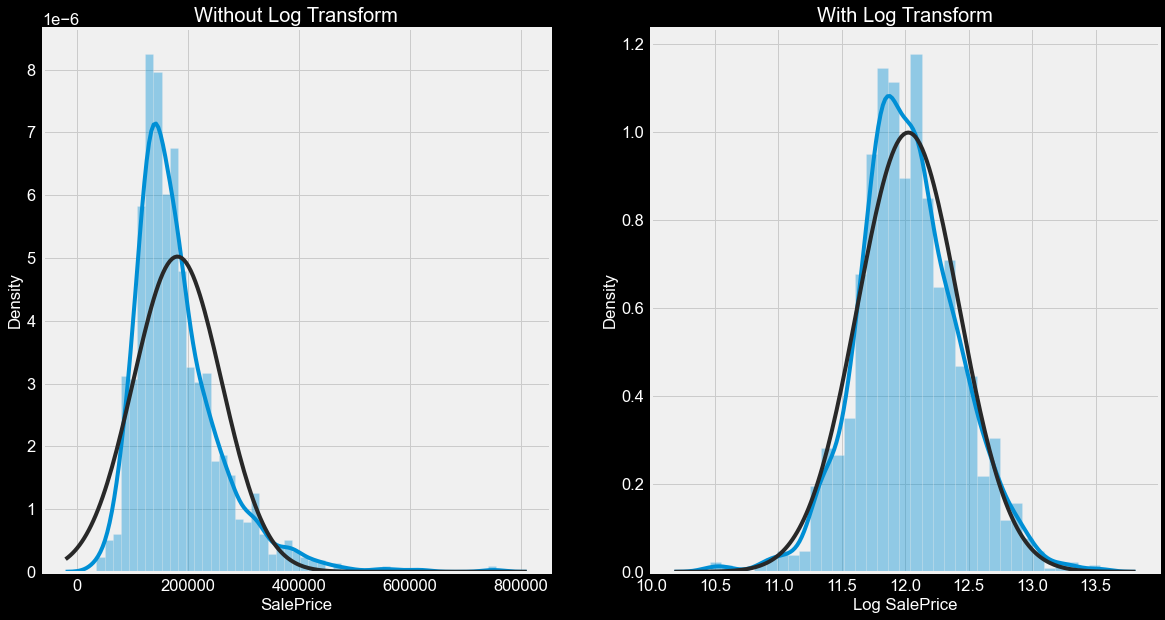

In [35]:
plt.figure(figsize=(20, 10))
plt.style.use("fivethirtyeight")
plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")
plt.show()

> You can see target data (blue kde tree) has skewed data distribution. If you have remember we have already transformed our features which followed skewed distribution. Same we have to perform here as well. 
I have log transformed target variable which converted skewed distributed data to almost normal distributed data.

> As we are log transforming target variable, it is very important to transform it back to original distribution after prediction. 
To convert log transformed data to its original form we have to apply exponential transform i.e., exp()

In [36]:
log_target = np.log(target) # log transforming target varible

# Modeling....

### Separating training and testing data

In [37]:
train_final = data8.loc[:train0.index.max(), :].copy()
test_final = data8.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

In [38]:
train_final

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.064176 -0.103719     0.646183    -0.435439   1.040634   
1        0.536077  0.146544    -0.063185     1.906370   0.161526   
2        0.066112  0.457629     0.646183    -0.435439   0.975922   
3       -0.295084  0.136301     0.646183    -0.435439  -1.869638   
4        0.677357  0.922662     1.355551    -0.435439   0.943542   
...           ...       ...          ...          ...        ...   
1455    -0.200527 -0.231508    -0.063185    -0.435439   0.911146   
1456     0.711638  0.767440    -0.063185     0.454875   0.227056   
1457    -0.020100  0.029092     0.646183     2.514892  -0.996100   
1458     0.066112  0.170303    -0.772552     0.454875  -0.696444   
1459     0.349325  0.214215    -0.772552     0.454875  -0.200076   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.896833    1.210174    0.783229   -0.363076  -0.326949   
1        -0.395604   -0.804554    0.892444   -0.363076   0.013428   
2         0.848965    1.137926    0.658154   -0.363076   0.240016   
3        -0.682812   -0.804554    0.386923   -0.363076   0.356870   
4         0.753229    1.430432    0.758108   -0.363076   0.304906   
...            ...         ...         ...         ...        ...   
1455      0.753229   -0.804554   -1.418196   -0.363076   0.660828   
1456      0.178812    1.021136    0.820898    2.351183   0.403330   
1457      1.040437   -0.804554    0.467619   -0.363076   0.616343   
1458      0.561757   -0.804554   -0.105594    3.329113  -3.015455   
1459     -0.922153   -0.804554    0.837450    2.656390  -0.379086   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        0.017291 -0.777287  1.196876     -0.116932   0.564627      1.135609   
1        0.347150  0.424865 -0.863610     -0.116932  -0.370371     -0.835139   
2        0.078551 -0.554028  1.201129     -0.116932   0.698477      1.135609   
3       -0.088244 -0.419015  1.159720     -0.116932   0.577201      1.135609   
4        0.264464  0.123520  1.260739     -0.116932   1.337430      1.135609   
...           ...       ...       ...           ...        ...           ...   
1455     0.108495 -0.444901  1.133640     -0.116932   0.449086     -0.835139   
1456     0.517469  1.962367 -0.863610     -0.116932   1.157188      1.135609   
1457     0.269644  0.237703  1.288139     -0.116932   1.530152     -0.835139   
1458     0.213223 -0.063225 -0.863610     -0.116932  -0.855305      1.135609   
1459     0.343100  0.410104 -0.863610     -0.116932  -0.385037      1.135609   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.251544  0.781366  1.265077      0.169927     -0.200513   
1         3.888856  0.781366 -0.764608      0.169927     -0.200513   
2        -0.251544  0.781366  1.265077      0.169927     -0.200513   
3        -0.251544 -1.027363 -0.764608      0.169927     -0.200513   
4        -0.251544  0.781366  1.265077      1.385655     -0.200513   
...            ...       ...       ...           ...           ...   
1455     -0.251544  0.781366  1.265077      0.169927     -0.200513   
1456     -0.251544  0.781366 -0.764608      0.169927     -0.200513   
1457     -0.251544  0.781366 -0.764608      1.385655     -0.200513   
1458     -0.251544 -1.027363 -0.764608     -1.045801     -0.200513   
1459     -0.251544 -1.027363  1.265077      0.169927     -0.200513   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         1.016638   -0.986172     1.004438    0.306418    0.348787   
1        -0.198448    0.769705    -0.064627    0.306418   -0.059898   
2        -0.198448    0.769705     0.925248    0.306418    0.627436   
3         0.447166    0.769705     0.806463    1.619830    0.785337   
4         1.526048    0.769705     0.885653    1.619830    1.686303   
...            ...         ...          ...         ...         ...   
1455      0.447166    0.769705     0.846058    0.306418   -0.

In [39]:
test_final

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.536077  0.521437    -0.772552     0.454875  -0.332070   
1        0.572040  0.923625    -0.063185     0.454875  -0.431241   
2        0.310504  0.862607    -0.772552    -0.435439   0.846305   
3        0.462798  0.222291    -0.063185     0.454875   0.878733   
4       -1.252596 -1.130892     1.355551    -0.435439   0.683917   
...           ...       ...          ...          ...        ...   
1454    -3.284214 -2.993401    -1.481920     1.226101  -0.035461   
1455    -3.284214 -3.036401    -1.481920    -0.435439  -0.035461   
1456     2.549545  1.586172    -0.772552     1.226101  -0.365110   
1457    -0.200527  0.311255    -0.772552    -0.435439   0.683917   
1458     0.310504  0.152052     0.646183    -0.435439   0.716427   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        -1.113625   -0.804554    0.645518    2.285649  -0.013563   
1        -1.257229    0.984472    0.873044   -0.363076   0.204364   
2         0.657493   -0.804554    0.821322   -0.363076  -0.375189   
3         0.657493    0.356462    0.729841   -0.363076   0.083804   
4         0.370284   -0.804554    0.452704   -0.363076   0.695621   
...            ...         ...         ...         ...        ...   
1454     -0.682812   -0.804554   -1.418196   -0.363076   0.362780   
1455     -0.682812   -0.804554    0.438424   -0.363076   0.031907   
1456      0.561757   -0.804554    0.967658   -0.363076  -3.015455   
1457      0.370284   -0.804554    0.535612   -0.363076   0.390461   
1458      0.466021    0.932048    0.807042   -0.363076  -0.080895   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        0.042712 -0.635877 -0.863610     -0.116932  -1.424253     -0.835139   
1        0.391116  0.585094 -0.863610     -0.116932  -0.211177     -0.835139   
2        0.085908 -0.527218  1.136698     -0.116932   0.415262     -0.835139   
3        0.084075 -0.533898  1.126531     -0.116932   0.367659     -0.835139   
4        0.359187  0.468732 -0.863610     -0.116932  -0.326788     -0.835139   
...           ...       ...       ...           ...        ...           ...   
1454    -0.364608 -2.169094  1.060554     -0.116932  -0.815601     -0.835139   
1455    -0.364608 -2.169094  1.060554     -0.116932  -0.815601     -0.835139   
1456     0.321166  0.330167 -0.863610     -0.116932  -0.464456      1.135609   
1457     0.071131 -0.390149 -0.863610     -0.116932  -1.180114     -0.835139   
1458     0.145994 -0.308237  1.246210     -0.116932   1.046832     -0.835139   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.251544 -1.027363 -0.764608     -1.045801     -0.200513   
1        -0.251544 -1.027363  1.265077      0.169927     -0.200513   
2        -0.251544  0.781366  1.265077      0.169927     -0.200513   
3        -0.251544  0.781366  1.265077      0.169927     -0.200513   
4        -0.251544  0.781366 -0.764608     -1.045801     -0.200513   
...            ...       ...       ...           ...           ...   
1454     -0.251544 -1.027363  1.265077      0.169927     -0.200513   
1455     -0.251544 -1.027363  1.265077      0.169927     -0.200513   
1456     -0.251544 -1.027363 -0.764608      1.385655     -0.200513   
1457      3.888856 -1.027363 -0.764608      0.169927     -0.200513   
1458     -0.251544  0.781366  1.265077      0.169927     -0.200513   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0        -0.943755   -0.986172    -0.658552   -1.006994    1.194023   
1        -0.198448   -0.986172    -0.777337   -1.006994   -0.747233   
2        -0.198448    0.769705     0.766868    0.306418    0.042273   
3         0.447166    0.769705     0.806463    0.306418   -0.013457   
4        -0.943755   -0.986172     0.568893    0.306418    0.153733   
...            ...         ...          ...         ...         ...   
1454     -0.943755   -0.986172    -0.151736   -2.320407   -2.

## Model Selection

In [35]:
# Mandatory function that need to be executed before executing any pycaret function
_ = setup(data=pd.concat([train_final, log_target], axis=1), target='SalePrice', use_gpu = True)

In [36]:
# This function trains and evaluates performance of all estimators available in the model library using cross validation.
compare_models()

In [67]:
# Comparing top 5 models

compare_models(['catboost', 'br', 'lightgbm', 'gbr', 'ridge', 'rf'])

### I will be working with top 5-6 models 

# Hyper-parameter tuning......

## Catboot (Hyperparameter Tuning)

In [38]:
#Hyper-parameter tuning using Optuna

kf = KFold(n_splits=5)

def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['random_seed']: 42
    
    regressor = CatBoostRegressor(**param,iterations=500)

    regressor.fit(train_final, log_target, eval_set = (train_final, log_target))
    
    # Applying negation to the predicted value because we are using negative mean squared error as our scoring function.
    # 
    cv_score = np.exp(np.sqrt(-cross_val_score(regressor, train_final, log_target, scoring = 'neg_mean_squared_error', cv = kf)))
    return cv_score

In [ ]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, n_jobs=-1)

# LightGBM 

In [152]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lightgbm_param ={
            'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.5],
            'num_leaves': sp_randint(6, 50), 
            'max_depth' : [110, 150, 190, 230, 270, 310],
            'n_estimators': [100, 150, 190, 230, 290, 330, 390, 450, 530],
            'min_child_samples': sp_randint(100, 500), 
            'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
            'subsample': sp_uniform(loc=0.2, scale=0.8), 
            'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
            'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
            'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}

In [153]:
kf = KFold(n_splits=5)
clf = LGBMRegressor(silent=True,n_jobs=-1)

gs = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=lightgbm_param, 
    n_iter=1000,
    scoring='neg_mean_squared_error',
    refit=True,
    cv = kf,
    verbose=1)

gs.fit(train_final, log_target, eval_metric = "RMSE")

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  7.2min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMRegressor(silent=True), n_iter=1000,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019F78D1A0D0>,
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.5],
                                        'max_depth': [110, 150, 190, 230, 270,
                                                      310],
                                        'min_child_samples': <scipy.stats._dist...
                                                             10000.0],
                                        'n_estimators': [100, 150, 190, 230,
                                                         290, 330, 390, 450,
                                                         530],
                                        'num_leaves': <scipy.sta

In [154]:
gs.best_params_

{'colsample_bytree': 0.4405628218842262,
 'learning_rate': 0.1,
 'max_depth': 230,
 'min_child_samples': 126,
 'min_child_weight': 10.0,
 'n_estimators': 390,
 'num_leaves': 48,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'subsample': 0.3814712706947254}

In [111]:
#Training with best hyperparameter

best_param = {
    'colsample_bytree': 0.4186980141640144,
    'learning_rate': 0.1,
    'min_child_samples': 117,
    'min_child_weight': 0.001,
    'n_estimators': 450,
    'num_leaves': 9,
    'reg_alpha': 0,
    'reg_lambda': 5,
    'subsample': 0.7229452393450786
}

lgm_clf = LGBMRegressor(silent=True,n_jobs=-1)
lgm_clf.fit(train_final, log_target, eval_metric = "RMSE")

lgm_pred = np.exp(lgm_clf.predict(test_final))
sample_submission.SalePrice = lgm_pred 
sample_submission.to_csv("00_lightgbm.csv", index = False)

# BayesianRidge

In [51]:
def br_objective(trial):
    kf = KFold(n_splits=10)
    n_iter = trial.suggest_int('n_iter', 50, 600)
    tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
    alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
    alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
    lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
    lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
    model = BayesianRidge(
        n_iter = n_iter,
        tol = tol,
        alpha_1 = alpha_1,
        alpha_2 = alpha_2,
        lambda_1 = lambda_1,
        lambda_2 = lambda_2
    )
    
    model.fit(train_final, log_target)
    cv_score = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring = 'neg_mean_squared_error', cv = kf)))
    return np.mean(cv_score)

In [52]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(br_objective, n_trials=500, n_jobs=-1)

[I 2022-03-20 00:29:20,079] A new study created in memory with name: no-name-26ff4941-e796-4f32-b213-bed824531618
[I 2022-03-20 00:29:22,536] Trial 3 finished with value: 1.1455875242244646 and parameters: {'n_iter': 134, 'tol': 8.486913975117517, 'alpha_1': 6.202620395512844e-07, 'alpha_2': 2.6832204864848244, 'lambda_1': 0.5810778362622586, 'lambda_2': 7.410924799035755e-08}. Best is trial 3 with value: 1.1455875242244646.
[I 2022-03-20 00:29:23,377] Trial 2 finished with value: 1.1569518395156195 and parameters: {'n_iter': 207, 'tol': 0.1867152265812986, 'alpha_1': 9.008522523490295e-08, 'alpha_2': 4.772143864069566e-07, 'lambda_1': 1.2589972496656337e-07, 'lambda_2': 5.809099412165932e-06}. Best is trial 3 with value: 1.1455875242244646.
[I 2022-03-20 00:29:23,703] Trial 5 finished with value: 1.2660923731142584 and parameters: {'n_iter': 535, 'tol': 1.0701891440492905e-05, 'alpha_1': 1.7091750973693732e-05, 'alpha_2': 1.847364423994538e-06, 'lambda_1': 1.6665720524367087, 'lambda_

[I 2022-03-20 00:29:34,456] Trial 26 finished with value: 1.14479493912718 and parameters: {'n_iter': 241, 'tol': 0.3996177668143965, 'alpha_1': 3.688292290681394e-05, 'alpha_2': 0.6072172894866291, 'lambda_1': 0.10949102668714181, 'lambda_2': 0.00010279556044022778}. Best is trial 17 with value: 1.1432985834496243.
[I 2022-03-20 00:29:34,600] Trial 28 finished with value: 1.1452661999835754 and parameters: {'n_iter': 273, 'tol': 1.169077978414795, 'alpha_1': 0.004172163834576082, 'alpha_2': 0.543596123769251, 'lambda_1': 0.2328388168967186, 'lambda_2': 7.629785280959045e-05}. Best is trial 17 with value: 1.1432985834496243.
[I 2022-03-20 00:29:34,631] Trial 29 finished with value: 1.1457081716325175 and parameters: {'n_iter': 265, 'tol': 1.3349728995159584, 'alpha_1': 0.003064154078058772, 'alpha_2': 0.4917397503618336, 'lambda_1': 0.2538020772397498, 'lambda_2': 8.63259860801223e-05}. Best is trial 17 with value: 1.1432985834496243.
[I 2022-03-20 00:29:35,193] Trial 16 finished with 

[I 2022-03-20 00:29:46,344] Trial 50 finished with value: 1.1438190205099805 and parameters: {'n_iter': 91, 'tol': 0.007701189599668473, 'alpha_1': 1.045657425850975e-08, 'alpha_2': 2.0702309808885153, 'lambda_1': 0.0004781901752623876, 'lambda_2': 2.65782163132587e-06}. Best is trial 31 with value: 1.1432163125708152.
[I 2022-03-20 00:29:46,530] Trial 51 finished with value: 1.1439862033239412 and parameters: {'n_iter': 113, 'tol': 0.004811938327632936, 'alpha_1': 2.721679902360746e-08, 'alpha_2': 2.1785646482640186, 'lambda_1': 0.00020756229663486611, 'lambda_2': 2.828540181415943e-06}. Best is trial 31 with value: 1.1432163125708152.
[I 2022-03-20 00:29:46,862] Trial 53 finished with value: 1.1510114842103711 and parameters: {'n_iter': 104, 'tol': 0.011456027476296699, 'alpha_1': 1.4526332743005733e-08, 'alpha_2': 0.16046485241995945, 'lambda_1': 0.0004343699137147089, 'lambda_2': 0.00036299633012465806}. Best is trial 31 with value: 1.1432163125708152.
[I 2022-03-20 00:29:46,949] T

[I 2022-03-20 00:29:58,699] Trial 72 finished with value: 1.1564580259052812 and parameters: {'n_iter': 189, 'tol': 0.03577366394428788, 'alpha_1': 6.497678387072937e-07, 'alpha_2': 4.039937880580783e-05, 'lambda_1': 0.5012152610096123, 'lambda_2': 2.6855504201574524e-05}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:29:59,143] Trial 77 finished with value: 1.1434152275838332 and parameters: {'n_iter': 198, 'tol': 3.0144218152317372, 'alpha_1': 9.747762216917351e-05, 'alpha_2': 0.9832330765740969, 'lambda_1': 0.5393731322935363, 'lambda_2': 3.170441001408288e-05}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:30:00,090] Trial 74 finished with value: 1.1488572059644055 and parameters: {'n_iter': 205, 'tol': 5.1877873561869436e-06, 'alpha_1': 9.630115527430711e-05, 'alpha_2': 4.4833995420050705, 'lambda_1': 0.11560430374147806, 'lambda_2': 2.8258296259672688e-05}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:30:00,650] Trial 7

[I 2022-03-20 00:30:11,106] Trial 100 finished with value: 1.146589873154139 and parameters: {'n_iter': 127, 'tol': 2.1712516074129136, 'alpha_1': 4.4314866548581995e-07, 'alpha_2': 3.5165824455841017, 'lambda_1': 0.05632281478955627, 'lambda_2': 1.6559307369228619e-06}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:30:11,710] Trial 101 finished with value: 1.1433265234622265 and parameters: {'n_iter': 181, 'tol': 2.1670485909823456, 'alpha_1': 8.379474571337596e-07, 'alpha_2': 1.052785456766555, 'lambda_1': 0.06476027551871498, 'lambda_2': 1.842967910412626e-08}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:30:12,110] Trial 102 finished with value: 1.143936112951121 and parameters: {'n_iter': 180, 'tol': 2.2004365166494972, 'alpha_1': 4.4834983929356744e-07, 'alpha_2': 0.807681976029483, 'lambda_1': 0.061822573577305646, 'lambda_2': 0.00013089848581750721}. Best is trial 68 with value: 1.1431883796189255.
[I 2022-03-20 00:30:12,656] Trial 103 f

[I 2022-03-20 00:30:23,273] Trial 121 finished with value: 1.1484708127040792 and parameters: {'n_iter': 125, 'tol': 0.00016823142328992633, 'alpha_1': 0.30330985499023083, 'alpha_2': 0.24922447024825156, 'lambda_1': 0.1633221678931809, 'lambda_2': 2.6497860444475e-08}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:23,490] Trial 127 finished with value: 1.1691453554632043 and parameters: {'n_iter': 130, 'tol': 5.67155799786238, 'alpha_1': 0.16720713301956694, 'alpha_2': 7.415969193916449e-07, 'lambda_1': 1.3954355684764945, 'lambda_2': 1.4722699445254345e-07}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:24,001] Trial 128 finished with value: 1.1578531939642898 and parameters: {'n_iter': 130, 'tol': 0.44914538448125535, 'alpha_1': 0.14267421199694175, 'alpha_2': 4.660472290359183e-07, 'lambda_1': 0.0007555637307912921, 'lambda_2': 1.2418422896595926e-07}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:24,022] Trial

[I 2022-03-20 00:30:35,155] Trial 149 finished with value: 1.143253097266303 and parameters: {'n_iter': 87, 'tol': 0.251531544076649, 'alpha_1': 1.048432726970026, 'alpha_2': 1.597058836140898, 'lambda_1': 5.759173529711583e-08, 'lambda_2': 2.226908736638381e-06}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:35,156] Trial 148 finished with value: 1.1431802233440904 and parameters: {'n_iter': 87, 'tol': 0.2637601906279356, 'alpha_1': 1.5211388321878734, 'alpha_2': 1.2899634969071159, 'lambda_1': 5.923726009757134e-08, 'lambda_2': 1.666727239591685e-06}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:35,882] Trial 153 finished with value: 1.1497468081370186 and parameters: {'n_iter': 82, 'tol': 3.2865532739254455, 'alpha_1': 0.439374039640484, 'alpha_2': 4.96264369639824, 'lambda_1': 1.5149137561193305e-07, 'lambda_2': 2.122159935085617e-06}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:35,956] Trial 152 finished wi

[I 2022-03-20 00:30:47,434] Trial 172 finished with value: 1.1462960362929409 and parameters: {'n_iter': 101, 'tol': 0.0004227686079948485, 'alpha_1': 0.9452661997175903, 'alpha_2': 0.41808868124083903, 'lambda_1': 4.168754940675484e-07, 'lambda_2': 3.764046297315211e-08}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:48,293] Trial 176 finished with value: 1.143179405075678 and parameters: {'n_iter': 119, 'tol': 0.00043913949121100006, 'alpha_1': 0.9004593248692919, 'alpha_2': 1.2792295268339116, 'lambda_1': 6.421673523611875e-08, 'lambda_2': 3.8679899449386465e-08}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:48,471] Trial 175 finished with value: 1.1431923461651645 and parameters: {'n_iter': 294, 'tol': 6.108042323943553e-08, 'alpha_1': 0.0011007449748700465, 'alpha_2': 1.22140493427042, 'lambda_1': 4.925170744632094e-08, 'lambda_2': 2.24029259456516e-08}. Best is trial 108 with value: 1.1431120770581984.
[I 2022-03-20 00:30:48,471] T

[I 2022-03-20 00:30:59,546] Trial 200 finished with value: 1.143361252461621 and parameters: {'n_iter': 162, 'tol': 0.17454046060211437, 'alpha_1': 0.4866100887986482, 'alpha_2': 1.0385375679453548, 'lambda_1': 2.6798941631733476e-07, 'lambda_2': 7.365641145155118e-08}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:00,383] Trial 201 finished with value: 1.1569326171971475 and parameters: {'n_iter': 168, 'tol': 0.15958318991306764, 'alpha_1': 0.00016961333614515657, 'alpha_2': 9.521114205358884e-05, 'lambda_1': 2.913675004324169e-07, 'lambda_2': 7.876105642149531e-08}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:00,779] Trial 203 finished with value: 1.143366353870627 and parameters: {'n_iter': 169, 'tol': 0.5610636025618881, 'alpha_1': 0.5722890918565037, 'alpha_2': 1.0420846260747283, 'lambda_1': 5.3776512531727655e-08, 'lambda_2': 1.491523354411495e-07}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:00,795] Tri

[I 2022-03-20 00:31:12,104] Trial 227 finished with value: 1.143258990579592 and parameters: {'n_iter': 485, 'tol': 0.8283325876108888, 'alpha_1': 0.0036984221505541497, 'alpha_2': 1.1192073539548548, 'lambda_1': 1.280319577312802e-07, 'lambda_2': 6.7831615515773695e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:12,366] Trial 228 finished with value: 1.1436256950452706 and parameters: {'n_iter': 488, 'tol': 0.9291979515307864, 'alpha_1': 0.377885683841448, 'alpha_2': 0.8991915504022436, 'lambda_1': 5.552371508513068e-06, 'lambda_2': 6.7329733063952435e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:12,408] Trial 223 finished with value: 1.143603457753119 and parameters: {'n_iter': 505, 'tol': 0.00026225668217445645, 'alpha_1': 0.003123321253972021, 'alpha_2': 0.8964251522626732, 'lambda_1': 1.8249071646654556e-05, 'lambda_2': 1.74977715018425e-08}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:13,656] Tria

[I 2022-03-20 00:31:24,485] Trial 250 finished with value: 1.1431711106051154 and parameters: {'n_iter': 363, 'tol': 0.016803112196408752, 'alpha_1': 0.0014182876908433496, 'alpha_2': 1.3049383943877009, 'lambda_1': 3.628004386948118e-08, 'lambda_2': 6.0317266905612705e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:25,471] Trial 251 finished with value: 1.1436925632409634 and parameters: {'n_iter': 60, 'tol': 0.0007141364477553828, 'alpha_1': 0.0008863680273905647, 'alpha_2': 0.861571938780354, 'lambda_1': 0.003154659502950491, 'lambda_2': 6.568791417709206e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:26,031] Trial 252 finished with value: 1.1441257122999398 and parameters: {'n_iter': 57, 'tol': 0.0007030925490173241, 'alpha_1': 3.536602697420812, 'alpha_2': 0.791367709237971, 'lambda_1': 3.710378608030779e-08, 'lambda_2': 8.068541900213338e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:27,196] Tri

[I 2022-03-20 00:31:37,059] Trial 273 finished with value: 1.1473375593528599 and parameters: {'n_iter': 80, 'tol': 0.039956960306735935, 'alpha_1': 6.318734079316103e-05, 'alpha_2': 0.3209596176559391, 'lambda_1': 4.033622800402988e-08, 'lambda_2': 3.4195275064279647e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:37,100] Trial 276 finished with value: 1.1431702631400364 and parameters: {'n_iter': 362, 'tol': 0.02221844348622213, 'alpha_1': 3.179977669075417, 'alpha_2': 1.375476148990853, 'lambda_1': 0.0035895517693592047, 'lambda_2': 3.4689169403504302e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:38,545] Trial 278 finished with value: 1.1489202100799736 and parameters: {'n_iter': 80, 'tol': 6.8423986943422825, 'alpha_1': 0.0007003074919132994, 'alpha_2': 0.38184905702826893, 'lambda_1': 0.1007571947935338, 'lambda_2': 3.3294266979736165e-06}. Best is trial 179 with value: 1.1431101157540557.
[I 2022-03-20 00:31:39,762] Trial 

[I 2022-03-20 00:31:49,913] Trial 300 finished with value: 1.143754716027129 and parameters: {'n_iter': 110, 'tol': 4.860378908452043, 'alpha_1': 4.656679909432008, 'alpha_2': 1.0115851117920156, 'lambda_1': 0.0023036796424291154, 'lambda_2': 3.8324364182861665e-08}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:31:50,262] Trial 301 finished with value: 1.1441081139157094 and parameters: {'n_iter': 326, 'tol': 4.342871995194868, 'alpha_1': 5.4704652695180345, 'alpha_2': 1.00159469913038, 'lambda_1': 0.0010927567347438077, 'lambda_2': 5.953495939345741e-08}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:31:50,530] Trial 302 finished with value: 1.1442222470018104 and parameters: {'n_iter': 68, 'tol': 4.4342832674938935, 'alpha_1': 4.804789914415212, 'alpha_2': 0.9588738863501176, 'lambda_1': 9.847543861872415e-08, 'lambda_2': 7.355302324677154e-08}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:31:51,328] Trial 303 finished 

[I 2022-03-20 00:32:02,095] Trial 324 finished with value: 1.1432062705492458 and parameters: {'n_iter': 84, 'tol': 0.2764384227047122, 'alpha_1': 0.6079174622166515, 'alpha_2': 1.2171692685808575, 'lambda_1': 4.579152264616307e-05, 'lambda_2': 6.003202170296984e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:03,451] Trial 326 finished with value: 1.1432135797383685 and parameters: {'n_iter': 344, 'tol': 0.34780225436896295, 'alpha_1': 0.5833094712183697, 'alpha_2': 1.1923962995980044, 'lambda_1': 5.426882973463194e-08, 'lambda_2': 2.1313485209183468e-08}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:05,225] Trial 327 finished with value: 1.1521517444819316 and parameters: {'n_iter': 342, 'tol': 0.22306910625013368, 'alpha_1': 0.0013257667846867376, 'alpha_2': 5.922145260117901, 'lambda_1': 4.945612225102529e-08, 'lambda_2': 4.0280374662764925e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:05,598] Trial 3

[I 2022-03-20 00:32:15,207] Trial 350 finished with value: 1.1451110071809445 and parameters: {'n_iter': 367, 'tol': 0.017372200959871645, 'alpha_1': 0.6509090948038732, 'alpha_2': 2.819253134754524, 'lambda_1': 0.0051386452619456855, 'lambda_2': 4.087477248372824e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:16,111] Trial 351 finished with value: 1.1448854399836397 and parameters: {'n_iter': 97, 'tol': 0.49629139228472624, 'alpha_1': 0.5510570974723714, 'alpha_2': 2.708353237121561, 'lambda_1': 0.001344862137961863, 'lambda_2': 4.259611624084812e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:17,431] Trial 352 finished with value: 1.1431926305383953 and parameters: {'n_iter': 85, 'tol': 0.020646365644231366, 'alpha_1': 0.031125124206381617, 'alpha_2': 1.5573129976448679, 'lambda_1': 3.69164961817107e-07, 'lambda_2': 0.00019811868124473277}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:18,167] Trial 354 

[I 2022-03-20 00:32:28,100] Trial 375 finished with value: 1.1444221162567685 and parameters: {'n_iter': 55, 'tol': 0.8782063051877207, 'alpha_1': 1.0046018063692497, 'alpha_2': 0.6897065438365396, 'lambda_1': 0.005127383767826595, 'lambda_2': 7.917258009072129e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:28,882] Trial 376 finished with value: 1.1456566232559189 and parameters: {'n_iter': 250, 'tol': 4.006671216383017, 'alpha_1': 1.0867540740072696, 'alpha_2': 0.6217960667173772, 'lambda_1': 0.002453323320989932, 'lambda_2': 8.83074576075718e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:30,529] Trial 377 finished with value: 1.1435092383770455 and parameters: {'n_iter': 114, 'tol': 0.8848781463251314, 'alpha_1': 2.4991086165234537, 'alpha_2': 1.9190480157004302, 'lambda_1': 0.0052058917408931695, 'lambda_2': 2.448208379211642e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:30,969] Trial 380 finishe

[I 2022-03-20 00:32:41,603] Trial 401 finished with value: 1.1461721749331588 and parameters: {'n_iter': 177, 'tol': 0.6153857861439969, 'alpha_1': 2.180669967560331, 'alpha_2': 3.430597281580235, 'lambda_1': 2.585080716811867e-07, 'lambda_2': 2.6561665983096036e-07}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:41,804] Trial 400 finished with value: 1.1460146385381669 and parameters: {'n_iter': 87, 'tol': 1.2157410012033905, 'alpha_1': 0.39176780661243527, 'alpha_2': 3.290749643509173, 'lambda_1': 2.23534827776602e-07, 'lambda_2': 1.9318614769014328e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:42,739] Trial 403 finished with value: 1.1607096338694318 and parameters: {'n_iter': 348, 'tol': 1.2366452601142652, 'alpha_1': 0.29006205840670524, 'alpha_2': 1.934826221949337e-05, 'lambda_1': 3.224915298601269e-08, 'lambda_2': 2.0713257068850832e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:43,590] Trial 402

[I 2022-03-20 00:32:54,808] Trial 426 finished with value: 1.1451314407121551 and parameters: {'n_iter': 399, 'tol': 8.6591181527468, 'alpha_1': 0.7530847900986046, 'alpha_2': 2.4606007082189447, 'lambda_1': 1.4702415316530047e-07, 'lambda_2': 0.013269817732852417}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:55,222] Trial 427 finished with value: 1.1451791700948668 and parameters: {'n_iter': 80, 'tol': 9.252700998483249, 'alpha_1': 2.108058920828435, 'alpha_2': 2.6522320945509366, 'lambda_1': 1.4517783855578678e-07, 'lambda_2': 1.0669729409289198e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:55,820] Trial 428 finished with value: 1.144760728849615 and parameters: {'n_iter': 401, 'tol': 9.126329908134178, 'alpha_1': 2.3428493054341213, 'alpha_2': 2.490820440920311, 'lambda_1': 1.5202732507706362e-07, 'lambda_2': 1.1035121887436564e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:32:55,951] Trial 423 finishe

[I 2022-03-20 00:33:08,232] Trial 447 finished with value: 1.1599532934785515 and parameters: {'n_iter': 61, 'tol': 0.012832501926354989, 'alpha_1': 9.724224366798653, 'alpha_2': 0.008195290275658091, 'lambda_1': 0.0008919708389354728, 'lambda_2': 5.274800412647263e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:08,581] Trial 450 finished with value: 1.143171939605962 and parameters: {'n_iter': 192, 'tol': 0.3096847274037505, 'alpha_1': 0.1374346224174083, 'alpha_2': 1.374185146227161, 'lambda_1': 9.232698454311342e-08, 'lambda_2': 5.754495655416047e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:08,654] Trial 452 finished with value: 1.1431975328749 and parameters: {'n_iter': 233, 'tol': 0.4386203035892899, 'alpha_1': 5.303334689385505, 'alpha_2': 1.3288207391065874, 'lambda_1': 8.545194867189995e-08, 'lambda_2': 5.2470356156320755e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:08,826] Trial 453 finis

[I 2022-03-20 00:33:21,211] Trial 479 finished with value: 1.1437538312995703 and parameters: {'n_iter': 380, 'tol': 6.644655603619394, 'alpha_1': 1.6222244941686563, 'alpha_2': 1.988461671371326, 'lambda_1': 0.008781355243553866, 'lambda_2': 3.088530402312484e-08}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:21,518] Trial 476 finished with value: 1.1436874101526229 and parameters: {'n_iter': 288, 'tol': 0.003939989110858323, 'alpha_1': 1.7649657231178446, 'alpha_2': 2.0397717419402985, 'lambda_1': 0.010237536222689948, 'lambda_2': 1.07531672038552e-05}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:21,977] Trial 474 finished with value: 1.1460715410934221 and parameters: {'n_iter': 272, 'tol': 0.004898386314502263, 'alpha_1': 6.573541037018626e-08, 'alpha_2': 0.4286418477143691, 'lambda_1': 0.009226820426635599, 'lambda_2': 9.412111739368896e-06}. Best is trial 286 with value: 1.1431003612918893.
[I 2022-03-20 00:33:21,995] Trial 475 f

CPU times: total: 11min 18s
Wall time: 4min 11s


In [53]:
study.best_params

{'n_iter': 94,
 'tol': 9.903079864484786,
 'alpha_1': 2.6999421143733717,
 'alpha_2': 1.419669774089183,
 'lambda_1': 0.003994203272662195,
 'lambda_2': 1.891814097977269e-06}

In [54]:
br = BayesianRidge(
    n_iter = 94, 
    tol = 9.903079864484786, 
    alpha_1 = 2.6999421143733717, 
    alpha_2 = 1.419669774089183, 
    lambda_1 = 8.382447626763299e-08, 
    lambda_2 = 9.215629988624826e-06
)
br.fit(train_final, log_target)
br_pred = np.exp(br.predict(test_final))

sample_submission.SalePrice = br_pred
sample_submission.to_csv("01_bayesian.csv", index=False)

## Gradient Boosting Classifier

we will be taking the following approach:

1. Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems

2. Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.

3. Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.

4. Lower the learning rate and increase the estimators proportionally to get more robust models.

In [176]:
# Fix learning rate and number of estimators for tuning tree-based parameters
from sklearn.ensemble import GradientBoostingRegressor

param_test1 = {'n_estimators':range(60,500,20)}

gb = GradientBoostingRegressor(
    learning_rate=0.1, 
    min_samples_split=500,
    max_depth=32
)

gsearch1 = GridSearchCV(estimator = gb, 
param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train_final, log_target)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=32,
                                                 min_samples_split=500),
             iid=False, n_jobs=-1,
             param_grid={'n_estimators': range(60, 500, 20)},
             scoring='neg_root_mean_squared_error')

In [177]:
gsearch1.best_params_

{'n_estimators': 380}

#### Tuning tree-specific parameters

In [178]:
# Tune max_depth and num_samples_split

param_test2 = {'max_depth':range(15,50,4), 'min_samples_split':range(1, 500, 20)}
gb2 = GradientBoostingRegressor(
    learning_rate=0.1, 
    n_estimators = 380,
    max_features='sqrt', 
    subsample=0.8
)

gsearch2 = GridSearchCV(
    estimator = gb2, 
    param_grid = param_test2,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    iid=False, 
    cv=5
)

gsearch2.fit(train_final, log_target)
gsearch2.best_params_

{'max_depth': 19, 'min_samples_split': 421}

In [180]:
# Tune min_samples_leaf

param_test3 = {'min_samples_leaf':range(3, 11, 2)}

gb3 = GradientBoostingRegressor(
    n_estimators = 380,
    max_depth = 19,
    min_samples_split= 421,
    learning_rate=0.1, 
    max_features='sqrt', 
    subsample=0.8,
    
)

gsearch3 = GridSearchCV(
    estimator = gb3, 
    param_grid = param_test3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    iid=False, 
    cv=5
)

gsearch3.fit(train_final, log_target)
gsearch3.best_params_

{'min_samples_leaf': 3}

In [181]:
# Tune max_features

param_test4 = {'max_features':range(7,27,2)}

gb4 = GradientBoostingRegressor(
    n_estimators = 380,
    max_depth = 19,
    min_samples_split= 421,
    min_samples_leaf = 3,   
    learning_rate=0.1,  
    subsample=0.8
    
)

gsearch4 = GridSearchCV(
    estimator = gb4, 
    param_grid = param_test4,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    iid=False, 
    cv=5
)

gsearch4.fit(train_final, log_target)
gsearch4.best_params_

{'max_features': 13}

In [183]:
# Tuning subsample and making models with lower learning rate

param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
kf = KFold(n_splits=10)

gb5 = GradientBoostingRegressor(
    n_estimators = 380,
    max_depth = 19,
    min_samples_split= 421,
    min_samples_leaf = 3,   
    learning_rate=0.1,
    max_features = 13
    
)

gsearch5 = GridSearchCV(
    estimator = gb5, 
    param_grid = param_test5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    iid=False, 
    cv=5
)

gsearch5.fit(train_final, log_target)
gsearch5.best_params_

{'subsample': 0.9}

In [184]:
# Tuning subsample and making models with lower learning rate

param_test5 = {'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5]}
kf = KFold(n_splits=10)

gb5 = GradientBoostingRegressor(
    n_estimators = 380,
    max_depth = 19,
    min_samples_split= 421,
    min_samples_leaf = 3,
    subsample = 0.9,
    max_features = 13
    
)

gsearch5 = GridSearchCV(
    estimator = gb5, 
    param_grid = param_test5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    iid=False, 
    cv=5
)

gsearch5.fit(train_final, log_target)
gsearch5.best_params_

{'learning_rate': 0.1}

In [185]:
# Tuning with best hyperparameters

gb_reg = GradientBoostingRegressor(
    
    n_estimators = 380,
    max_depth = 19,
    min_samples_split= 421,
    min_samples_leaf = 3,   
    learning_rate=0.1,
    max_features = 13,
    subsample = 0.9
)

gb_reg.fit(train_final, log_target)
gb_pred = np.exp(gb_reg.predict(test_final))

sample_submission.SalePrice = gb_pred
sample_submission.to_csv("00_gradinet_boosting.csv", index=False)

In [186]:
gb_pred

array([123217.2335524 , 154909.33049461, 192223.89294855, ...,
       173812.19214833, 116503.37000847, 214800.9263046 ])

# XGBoost Regressor

In [45]:
%%time
# Using gridsearchCV

xgb_reg_2 = xgb.XGBRegressor(objective='reg:squarederror', eval_metric = "rmse",
                         nthread = -1, verbosity=1)


# define search space
params = {
        'eta': [0.05, 0.001, 0.1, 0.3],
        'max_depth': [17, 19, 23,25],
        'subsample': [0.9, 1.0, 0.8],
        'colsample_bytree': [0.9, 1.0, 0.8],
        'alpha': [0.1, 0.3, 0.0]
    }


# define search
random_search = RandomizedSearchCV(xgb_reg_2, params, n_jobs=-1, cv=5, n_iter=500, verbose=1, scoring='neg_root_mean_squared_error')

# execute search
random_search.fit(train_final, log_target, verbose=1)
random_search.best_params_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 19.1min finished


CPU times: total: 17.3 s
Wall time: 19min 6s


{'subsample': 0.8,
 'max_depth': 17,
 'eta': 0.1,
 'colsample_bytree': 1.0,
 'alpha': 0.0}

In [37]:
# Hyperparameter tuning using Optuna

kf = KFold(n_splits=5)

def xgb_objective(trial):
    params = {
          'learning_rate': trial.suggest_float('learning_rate', 1e-2, 0.5, log=True),
          'n_estimators': trial.suggest_int('n_estimators', 100, 10000),
          'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
          'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 100.0),
          'max_depth': trial.suggest_int('max_depth', 7, 31),
          'subsample': trial.suggest_float('subsample', 0.1, 1.0),
          'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
          'booster': 'gbtree',
          'verbosity': 0,
          'tree_method':'gpu_hist',
          'gpu_id': 0,
          'predictor': 'gpu_predictor'
          }
    
    model = xgb.XGBRegressor(**params)      
    model.fit(train_final,log_target, eval_set=[(train_final,log_target)],early_stopping_rounds=100,verbose=False)
    
    cv_score = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring = 'neg_mean_squared_error', cv = kf)))
    return np.mean(cv_score)

In [ ]:
%%time
study = optuna.create_study(direction="minimize")
study.optimize(xgb_objective, n_trials=100, n_jobs=-1)

# Training models with best parameters obtained after hyperparameter tuning

In [44]:
# Best paramters of different algos

catboost_params = {
     'loss_function': 'RMSE',
     'learning_rate': 0.05390135799951643,
     'l2_leaf_reg': 0.9655351210081248,
     'colsample_bylevel': 0.0659969929673369,
     'depth': 6,
     'eval_metric':'RMSE',
     'boosting_type': 'Plain',
     'bootstrap_type': 'Bernoulli',
     'min_data_in_leaf': 20,
     'one_hot_max_size': 19,
     'subsample': 0.9788475203794202
}

br_params = {
    'n_iter': 283,
    'tol': 2.1951023641074547e-06,
    'alpha_1': 5.715647519300009e-06,
    'alpha_2': 9.997760168357678,
    'lambda_1': 9.993134381480585,
    'lambda_2': 1.8445180246820987e-06
}


lightgbm_params = {'colsample_bytree': 0.4405628218842262,
 'learning_rate': 0.1,
 'max_depth': 230,
 'min_child_samples': 126,
 'min_child_weight': 10.0,
 'n_estimators': 390,
 'num_leaves': 48,
 'reg_alpha': 1,
 'reg_lambda': 5,
 'subsample': 0.3814712706947254}


gb_params = {
    'n_estimators' : 2000,
    'max_depth' : 31,
    'min_samples_leaf' : 3,
    'min_samples_split' : 141,
    'max_features' : 15,
    'subsample' : 0.8,
    'learning_rate' : 0.01 
}

xgb_params = {
    
    'tree_method' : 'gpu_hist', 
    'gpu_id' : 0, 
    'learning_rate' : 0.1, 
    'max_depth' : 25,
    'n_estimators' : 270,
    'subsample' : 0.8
}

In [45]:
# Creating a dictionay containing model name as key and it's initialized algo obj as value

models = {
    "catboost": CatBoostRegressor(**catboost_params),
    "bayes_ridge": BayesianRidge(**br_params),
    "gb" : GradientBoostingRegressor(**gb_params),
    "lightgbm": LGBMRegressor(**lightgbm_params, n_jobs = -1),
    "xgb" : xgb.XGBRegressor(**xgb_params, nthread = -1)
}

In [46]:
# Fitting models on dataset

for name, model in tqdm(models.items()):
    model.fit(train_final, log_target)
    print(name + " trained.")

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

0:	learn: 0.3858370	total: 143ms	remaining: 2m 22s
1:	learn: 0.3745095	total: 146ms	remaining: 1m 12s
2:	learn: 0.3627586	total: 148ms	remaining: 49.1s
3:	learn: 0.3505943	total: 150ms	remaining: 37.3s
4:	learn: 0.3398455	total: 152ms	remaining: 30.2s
5:	learn: 0.3306226	total: 154ms	remaining: 25.5s
6:	learn: 0.3207230	total: 156ms	remaining: 22.2s
7:	learn: 0.3101216	total: 158ms	remaining: 19.7s
8:	learn: 0.3021787	total: 161ms	remaining: 17.7s
9:	learn: 0.2937824	total: 163ms	remaining: 16.1s
10:	learn: 0.2855640	total: 165ms	remaining: 14.9s
11:	learn: 0.2774783	total: 167ms	remaining: 13.8s
12:	learn: 0.2703080	total: 169ms	remaining: 12.9s
13:	learn: 0.2624112	total: 172ms	remaining: 12.1s
14:	learn: 0.2555481	total: 174ms	remaining: 11.4s
15:	learn: 0.2496030	total: 176ms	remaining: 10.8s
16:	learn: 0.2435653	total: 179ms	remaining: 10.3s
17:	learn: 0.2376871	total: 181ms	remaining: 9.86s
18:	learn: 0.2314897	total: 183ms	remaining: 9.44s
19:	learn: 0.2256006	total: 185ms	remai

238:	learn: 0.0774163	total: 679ms	remaining: 2.16s
239:	learn: 0.0771685	total: 681ms	remaining: 2.16s
240:	learn: 0.0769711	total: 684ms	remaining: 2.15s
241:	learn: 0.0768584	total: 686ms	remaining: 2.15s
242:	learn: 0.0767002	total: 688ms	remaining: 2.14s
243:	learn: 0.0765391	total: 690ms	remaining: 2.14s
244:	learn: 0.0763690	total: 693ms	remaining: 2.13s
245:	learn: 0.0761878	total: 695ms	remaining: 2.13s
246:	learn: 0.0760567	total: 698ms	remaining: 2.13s
247:	learn: 0.0759513	total: 701ms	remaining: 2.12s
248:	learn: 0.0757489	total: 703ms	remaining: 2.12s
249:	learn: 0.0756001	total: 705ms	remaining: 2.11s
250:	learn: 0.0754271	total: 708ms	remaining: 2.11s
251:	learn: 0.0752974	total: 710ms	remaining: 2.11s
252:	learn: 0.0752083	total: 713ms	remaining: 2.1s
253:	learn: 0.0750273	total: 715ms	remaining: 2.1s
254:	learn: 0.0749405	total: 717ms	remaining: 2.09s
255:	learn: 0.0748181	total: 719ms	remaining: 2.09s
256:	learn: 0.0746082	total: 721ms	remaining: 2.08s
257:	learn: 0.

471:	learn: 0.0523200	total: 1.21s	remaining: 1.35s
472:	learn: 0.0522424	total: 1.21s	remaining: 1.35s
473:	learn: 0.0521856	total: 1.21s	remaining: 1.34s
474:	learn: 0.0520931	total: 1.21s	remaining: 1.34s
475:	learn: 0.0520118	total: 1.22s	remaining: 1.34s
476:	learn: 0.0519385	total: 1.22s	remaining: 1.34s
477:	learn: 0.0518798	total: 1.22s	remaining: 1.33s
478:	learn: 0.0518077	total: 1.22s	remaining: 1.33s
479:	learn: 0.0517598	total: 1.23s	remaining: 1.33s
480:	learn: 0.0516866	total: 1.23s	remaining: 1.32s
481:	learn: 0.0516127	total: 1.23s	remaining: 1.32s
482:	learn: 0.0515113	total: 1.23s	remaining: 1.32s
483:	learn: 0.0514524	total: 1.24s	remaining: 1.32s
484:	learn: 0.0513790	total: 1.24s	remaining: 1.31s
485:	learn: 0.0512991	total: 1.24s	remaining: 1.31s
486:	learn: 0.0512635	total: 1.24s	remaining: 1.31s
487:	learn: 0.0511343	total: 1.25s	remaining: 1.31s
488:	learn: 0.0510579	total: 1.25s	remaining: 1.3s
489:	learn: 0.0510001	total: 1.25s	remaining: 1.3s
490:	learn: 0.

632:	learn: 0.0420130	total: 1.57s	remaining: 913ms
633:	learn: 0.0419657	total: 1.58s	remaining: 910ms
634:	learn: 0.0418971	total: 1.58s	remaining: 908ms
635:	learn: 0.0418426	total: 1.58s	remaining: 905ms
636:	learn: 0.0418026	total: 1.58s	remaining: 903ms
637:	learn: 0.0417667	total: 1.59s	remaining: 900ms
638:	learn: 0.0417183	total: 1.59s	remaining: 898ms
639:	learn: 0.0416442	total: 1.59s	remaining: 895ms
640:	learn: 0.0415684	total: 1.59s	remaining: 893ms
641:	learn: 0.0415094	total: 1.6s	remaining: 890ms
642:	learn: 0.0414598	total: 1.6s	remaining: 888ms
643:	learn: 0.0414126	total: 1.6s	remaining: 885ms
644:	learn: 0.0413036	total: 1.6s	remaining: 883ms
645:	learn: 0.0412588	total: 1.6s	remaining: 880ms
646:	learn: 0.0411793	total: 1.61s	remaining: 878ms
647:	learn: 0.0411260	total: 1.61s	remaining: 875ms
648:	learn: 0.0410958	total: 1.61s	remaining: 872ms
649:	learn: 0.0410597	total: 1.61s	remaining: 870ms
650:	learn: 0.0410318	total: 1.62s	remaining: 867ms
651:	learn: 0.040

791:	learn: 0.0344714	total: 1.94s	remaining: 509ms
792:	learn: 0.0344521	total: 1.94s	remaining: 506ms
793:	learn: 0.0344262	total: 1.94s	remaining: 504ms
794:	learn: 0.0343779	total: 1.94s	remaining: 501ms
795:	learn: 0.0343484	total: 1.95s	remaining: 499ms
796:	learn: 0.0343272	total: 1.95s	remaining: 496ms
797:	learn: 0.0342914	total: 1.95s	remaining: 494ms
798:	learn: 0.0342593	total: 1.95s	remaining: 491ms
799:	learn: 0.0342322	total: 1.96s	remaining: 489ms
800:	learn: 0.0341858	total: 1.96s	remaining: 486ms
801:	learn: 0.0341626	total: 1.96s	remaining: 484ms
802:	learn: 0.0340810	total: 1.96s	remaining: 482ms
803:	learn: 0.0340397	total: 1.97s	remaining: 480ms
804:	learn: 0.0340013	total: 1.97s	remaining: 477ms
805:	learn: 0.0339610	total: 1.97s	remaining: 474ms
806:	learn: 0.0339247	total: 1.97s	remaining: 472ms
807:	learn: 0.0338783	total: 1.98s	remaining: 469ms
808:	learn: 0.0338076	total: 1.98s	remaining: 467ms
809:	learn: 0.0337479	total: 1.98s	remaining: 465ms
810:	learn: 

 20%|████████████████▊                                                                   | 1/5 [00:02<00:10,  2.58s/it]

956:	learn: 0.0281234	total: 2.31s	remaining: 104ms
957:	learn: 0.0280795	total: 2.31s	remaining: 101ms
958:	learn: 0.0280493	total: 2.31s	remaining: 98.8ms
959:	learn: 0.0280332	total: 2.31s	remaining: 96.3ms
960:	learn: 0.0280089	total: 2.31s	remaining: 93.9ms
961:	learn: 0.0279714	total: 2.32s	remaining: 91.5ms
962:	learn: 0.0279295	total: 2.32s	remaining: 89.1ms
963:	learn: 0.0279043	total: 2.32s	remaining: 86.7ms
964:	learn: 0.0278880	total: 2.33s	remaining: 84.3ms
965:	learn: 0.0278269	total: 2.33s	remaining: 81.9ms
966:	learn: 0.0277835	total: 2.33s	remaining: 79.6ms
967:	learn: 0.0277506	total: 2.33s	remaining: 77.1ms
968:	learn: 0.0277182	total: 2.34s	remaining: 74.7ms
969:	learn: 0.0276915	total: 2.34s	remaining: 72.3ms
970:	learn: 0.0276513	total: 2.34s	remaining: 69.9ms
971:	learn: 0.0276220	total: 2.34s	remaining: 67.5ms
972:	learn: 0.0275977	total: 2.35s	remaining: 65.1ms
973:	learn: 0.0275418	total: 2.35s	remaining: 62.7ms
974:	learn: 0.0275170	total: 2.35s	remaining: 60

 40%|█████████████████████████████████▌                                                  | 2/5 [00:02<00:03,  1.13s/it]

bayes_ridge trained.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:06<00:04,  2.30s/it]

gb trained.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:06<00:01,  1.49s/it]

lightgbm trained.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:07<00:00, 13.56s/it]

xgb trained.


## Individual Model Predictions.......

In [194]:
# predction using Gradient boosting 
pred = np.exp(models['gb'].predict(test_final))
sample_submission.SalePrice = pred
sample_submission.to_csv("00_gb.csv", index = False)

# Score: 0.12339

In [195]:
# predction using catboost 
pred = np.exp(models['catboost'].predict(test_final))
sample_submission.SalePrice = pred
sample_submission.to_csv("00_catboost.csv", index = False)

# Score: 0.12572

In [196]:
# predction using Bayesian Ridge 
pred = np.exp(models['bayes_ridge'].predict(test_final))
sample_submission.SalePrice = pred
sample_submission.to_csv("00_bayes_ridge.csv", index = False)

# Score: 0.12926

In [197]:
# predction using lightgbm 
pred = np.exp(models['lightgbm'].predict(test_final))
sample_submission.SalePrice = pred
sample_submission.to_csv("00_lightbm.csv", index = False)

# Score: 0.13754

In [47]:
# predction using xgb 
pred = np.exp(models['xgb'].predict(test_final))
sample_submission.SalePrice = pred
sample_submission.to_csv("00_xgboost.csv", index = False)

# Score: 0.79615

# Evaluate

In [62]:
results = {}

kf = KFold(n_splits=5)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

0:	learn: 0.3914370	total: 1.37ms	remaining: 1.37s
1:	learn: 0.3787043	total: 3.94ms	remaining: 1.97s
2:	learn: 0.3661759	total: 6.29ms	remaining: 2.09s
3:	learn: 0.3549572	total: 8.09ms	remaining: 2.02s
4:	learn: 0.3466037	total: 11ms	remaining: 2.19s
5:	learn: 0.3354431	total: 13.1ms	remaining: 2.17s
6:	learn: 0.3258197	total: 15.3ms	remaining: 2.17s
7:	learn: 0.3159678	total: 17.7ms	remaining: 2.19s
8:	learn: 0.3067634	total: 20.1ms	remaining: 2.21s
9:	learn: 0.2984684	total: 22.7ms	remaining: 2.25s
10:	learn: 0.2895270	total: 24.7ms	remaining: 2.22s
11:	learn: 0.2831043	total: 26.9ms	remaining: 2.21s
12:	learn: 0.2754618	total: 29ms	remaining: 2.21s
13:	learn: 0.2682632	total: 30.9ms	remaining: 2.17s
14:	learn: 0.2616179	total: 32.7ms	remaining: 2.15s
15:	learn: 0.2544771	total: 35ms	remaining: 2.15s
16:	learn: 0.2486607	total: 36.9ms	remaining: 2.13s
17:	learn: 0.2429651	total: 38.7ms	remaining: 2.11s
18:	learn: 0.2372143	total: 41.4ms	remaining: 2.14s
19:	learn: 0.2322565	total: 

183:	learn: 0.0857871	total: 357ms	remaining: 1.58s
184:	learn: 0.0854697	total: 359ms	remaining: 1.58s
185:	learn: 0.0852063	total: 362ms	remaining: 1.58s
186:	learn: 0.0848280	total: 364ms	remaining: 1.58s
187:	learn: 0.0846146	total: 366ms	remaining: 1.58s
188:	learn: 0.0844186	total: 368ms	remaining: 1.58s
189:	learn: 0.0842321	total: 371ms	remaining: 1.58s
190:	learn: 0.0840206	total: 373ms	remaining: 1.58s
191:	learn: 0.0837796	total: 375ms	remaining: 1.58s
192:	learn: 0.0835461	total: 377ms	remaining: 1.58s
193:	learn: 0.0833289	total: 379ms	remaining: 1.58s
194:	learn: 0.0830988	total: 382ms	remaining: 1.57s
195:	learn: 0.0828821	total: 384ms	remaining: 1.57s
196:	learn: 0.0826868	total: 387ms	remaining: 1.58s
197:	learn: 0.0824813	total: 401ms	remaining: 1.62s
198:	learn: 0.0823174	total: 403ms	remaining: 1.62s
199:	learn: 0.0819960	total: 405ms	remaining: 1.62s
200:	learn: 0.0818020	total: 415ms	remaining: 1.65s
201:	learn: 0.0815785	total: 418ms	remaining: 1.65s
202:	learn: 

354:	learn: 0.0591552	total: 709ms	remaining: 1.29s
355:	learn: 0.0590799	total: 711ms	remaining: 1.29s
356:	learn: 0.0589337	total: 713ms	remaining: 1.28s
357:	learn: 0.0588292	total: 715ms	remaining: 1.28s
358:	learn: 0.0587666	total: 717ms	remaining: 1.28s
359:	learn: 0.0585795	total: 719ms	remaining: 1.28s
360:	learn: 0.0585178	total: 720ms	remaining: 1.27s
361:	learn: 0.0584305	total: 723ms	remaining: 1.27s
362:	learn: 0.0583080	total: 725ms	remaining: 1.27s
363:	learn: 0.0582189	total: 726ms	remaining: 1.27s
364:	learn: 0.0580880	total: 729ms	remaining: 1.27s
365:	learn: 0.0579447	total: 731ms	remaining: 1.27s
366:	learn: 0.0578517	total: 733ms	remaining: 1.26s
367:	learn: 0.0577961	total: 736ms	remaining: 1.26s
368:	learn: 0.0577080	total: 738ms	remaining: 1.26s
369:	learn: 0.0575670	total: 739ms	remaining: 1.26s
370:	learn: 0.0574231	total: 741ms	remaining: 1.26s
371:	learn: 0.0573104	total: 743ms	remaining: 1.25s
372:	learn: 0.0572093	total: 745ms	remaining: 1.25s
373:	learn: 

520:	learn: 0.0444558	total: 1.07s	remaining: 984ms
521:	learn: 0.0444002	total: 1.07s	remaining: 981ms
522:	learn: 0.0442993	total: 1.07s	remaining: 979ms
523:	learn: 0.0442050	total: 1.07s	remaining: 977ms
524:	learn: 0.0441421	total: 1.08s	remaining: 975ms
525:	learn: 0.0440712	total: 1.08s	remaining: 973ms
526:	learn: 0.0440029	total: 1.08s	remaining: 971ms
527:	learn: 0.0439260	total: 1.08s	remaining: 969ms
528:	learn: 0.0438359	total: 1.08s	remaining: 966ms
529:	learn: 0.0437597	total: 1.09s	remaining: 965ms
530:	learn: 0.0436668	total: 1.09s	remaining: 962ms
531:	learn: 0.0436396	total: 1.09s	remaining: 960ms
532:	learn: 0.0436008	total: 1.09s	remaining: 959ms
533:	learn: 0.0435537	total: 1.09s	remaining: 956ms
534:	learn: 0.0434663	total: 1.1s	remaining: 954ms
535:	learn: 0.0434141	total: 1.1s	remaining: 952ms
536:	learn: 0.0433823	total: 1.1s	remaining: 950ms
537:	learn: 0.0432875	total: 1.1s	remaining: 948ms
538:	learn: 0.0431784	total: 1.11s	remaining: 946ms
539:	learn: 0.04

706:	learn: 0.0334004	total: 1.43s	remaining: 593ms
707:	learn: 0.0333437	total: 1.43s	remaining: 591ms
708:	learn: 0.0332865	total: 1.43s	remaining: 589ms
709:	learn: 0.0332288	total: 1.44s	remaining: 587ms
710:	learn: 0.0331715	total: 1.44s	remaining: 585ms
711:	learn: 0.0331418	total: 1.44s	remaining: 583ms
712:	learn: 0.0330856	total: 1.44s	remaining: 581ms
713:	learn: 0.0330495	total: 1.44s	remaining: 579ms
714:	learn: 0.0330017	total: 1.45s	remaining: 577ms
715:	learn: 0.0329776	total: 1.45s	remaining: 575ms
716:	learn: 0.0329261	total: 1.45s	remaining: 573ms
717:	learn: 0.0328481	total: 1.46s	remaining: 572ms
718:	learn: 0.0328061	total: 1.46s	remaining: 570ms
719:	learn: 0.0327585	total: 1.46s	remaining: 568ms
720:	learn: 0.0327085	total: 1.46s	remaining: 566ms
721:	learn: 0.0326546	total: 1.47s	remaining: 564ms
722:	learn: 0.0326073	total: 1.47s	remaining: 562ms
723:	learn: 0.0325577	total: 1.47s	remaining: 560ms
724:	learn: 0.0325024	total: 1.47s	remaining: 558ms
725:	learn: 

881:	learn: 0.0261386	total: 1.79s	remaining: 239ms
882:	learn: 0.0261120	total: 1.79s	remaining: 237ms
883:	learn: 0.0260654	total: 1.79s	remaining: 235ms
884:	learn: 0.0260238	total: 1.79s	remaining: 233ms
885:	learn: 0.0259755	total: 1.79s	remaining: 231ms
886:	learn: 0.0259239	total: 1.79s	remaining: 229ms
887:	learn: 0.0258908	total: 1.8s	remaining: 227ms
888:	learn: 0.0258699	total: 1.8s	remaining: 225ms
889:	learn: 0.0258450	total: 1.8s	remaining: 223ms
890:	learn: 0.0258226	total: 1.8s	remaining: 221ms
891:	learn: 0.0257994	total: 1.8s	remaining: 219ms
892:	learn: 0.0257666	total: 1.81s	remaining: 217ms
893:	learn: 0.0257170	total: 1.81s	remaining: 214ms
894:	learn: 0.0256580	total: 1.81s	remaining: 212ms
895:	learn: 0.0256146	total: 1.81s	remaining: 210ms
896:	learn: 0.0255812	total: 1.81s	remaining: 208ms
897:	learn: 0.0255558	total: 1.82s	remaining: 206ms
898:	learn: 0.0255144	total: 1.82s	remaining: 204ms
899:	learn: 0.0254647	total: 1.82s	remaining: 202ms
900:	learn: 0.025

120:	learn: 0.0984224	total: 251ms	remaining: 1.82s
121:	learn: 0.0981459	total: 253ms	remaining: 1.82s
122:	learn: 0.0978966	total: 255ms	remaining: 1.82s
123:	learn: 0.0976365	total: 257ms	remaining: 1.82s
124:	learn: 0.0973649	total: 259ms	remaining: 1.81s
125:	learn: 0.0971344	total: 261ms	remaining: 1.81s
126:	learn: 0.0969105	total: 263ms	remaining: 1.81s
127:	learn: 0.0967101	total: 264ms	remaining: 1.8s
128:	learn: 0.0963028	total: 266ms	remaining: 1.8s
129:	learn: 0.0960478	total: 268ms	remaining: 1.79s
130:	learn: 0.0958424	total: 271ms	remaining: 1.79s
131:	learn: 0.0955643	total: 273ms	remaining: 1.79s
132:	learn: 0.0952055	total: 275ms	remaining: 1.79s
133:	learn: 0.0949566	total: 277ms	remaining: 1.79s
134:	learn: 0.0946055	total: 279ms	remaining: 1.79s
135:	learn: 0.0944471	total: 280ms	remaining: 1.78s
136:	learn: 0.0941314	total: 282ms	remaining: 1.78s
137:	learn: 0.0939019	total: 284ms	remaining: 1.77s
138:	learn: 0.0936331	total: 286ms	remaining: 1.77s
139:	learn: 0.

297:	learn: 0.0645270	total: 610ms	remaining: 1.44s
298:	learn: 0.0643299	total: 613ms	remaining: 1.44s
299:	learn: 0.0642289	total: 615ms	remaining: 1.43s
300:	learn: 0.0641040	total: 617ms	remaining: 1.43s
301:	learn: 0.0640263	total: 619ms	remaining: 1.43s
302:	learn: 0.0638457	total: 621ms	remaining: 1.43s
303:	learn: 0.0637567	total: 624ms	remaining: 1.43s
304:	learn: 0.0636013	total: 626ms	remaining: 1.43s
305:	learn: 0.0634658	total: 628ms	remaining: 1.42s
306:	learn: 0.0633203	total: 630ms	remaining: 1.42s
307:	learn: 0.0631273	total: 632ms	remaining: 1.42s
308:	learn: 0.0629512	total: 634ms	remaining: 1.42s
309:	learn: 0.0628384	total: 636ms	remaining: 1.42s
310:	learn: 0.0627693	total: 638ms	remaining: 1.41s
311:	learn: 0.0626432	total: 640ms	remaining: 1.41s
312:	learn: 0.0625550	total: 642ms	remaining: 1.41s
313:	learn: 0.0624364	total: 643ms	remaining: 1.41s
314:	learn: 0.0622250	total: 645ms	remaining: 1.4s
315:	learn: 0.0621514	total: 647ms	remaining: 1.4s
316:	learn: 0.

493:	learn: 0.0452012	total: 1.01s	remaining: 1.03s
494:	learn: 0.0451362	total: 1.01s	remaining: 1.03s
495:	learn: 0.0450747	total: 1.01s	remaining: 1.03s
496:	learn: 0.0449482	total: 1.01s	remaining: 1.02s
497:	learn: 0.0448734	total: 1.01s	remaining: 1.02s
498:	learn: 0.0447978	total: 1.02s	remaining: 1.02s
499:	learn: 0.0447835	total: 1.02s	remaining: 1.02s
500:	learn: 0.0446916	total: 1.02s	remaining: 1.02s
501:	learn: 0.0446301	total: 1.02s	remaining: 1.01s
502:	learn: 0.0445593	total: 1.02s	remaining: 1.01s
503:	learn: 0.0444968	total: 1.03s	remaining: 1.01s
504:	learn: 0.0444085	total: 1.03s	remaining: 1.01s
505:	learn: 0.0443237	total: 1.03s	remaining: 1s
506:	learn: 0.0442533	total: 1.03s	remaining: 1s
507:	learn: 0.0441358	total: 1.03s	remaining: 1s
508:	learn: 0.0440408	total: 1.04s	remaining: 1000ms
509:	learn: 0.0439559	total: 1.04s	remaining: 998ms
510:	learn: 0.0438704	total: 1.04s	remaining: 995ms
511:	learn: 0.0438049	total: 1.04s	remaining: 994ms
512:	learn: 0.043721

682:	learn: 0.0337550	total: 1.36s	remaining: 633ms
683:	learn: 0.0337078	total: 1.36s	remaining: 631ms
684:	learn: 0.0336769	total: 1.37s	remaining: 628ms
685:	learn: 0.0336063	total: 1.37s	remaining: 627ms
686:	learn: 0.0335675	total: 1.37s	remaining: 624ms
687:	learn: 0.0334659	total: 1.37s	remaining: 622ms
688:	learn: 0.0334244	total: 1.37s	remaining: 620ms
689:	learn: 0.0333358	total: 1.38s	remaining: 618ms
690:	learn: 0.0332763	total: 1.38s	remaining: 617ms
691:	learn: 0.0332091	total: 1.38s	remaining: 615ms
692:	learn: 0.0331702	total: 1.38s	remaining: 613ms
693:	learn: 0.0331474	total: 1.39s	remaining: 611ms
694:	learn: 0.0331161	total: 1.39s	remaining: 609ms
695:	learn: 0.0330662	total: 1.39s	remaining: 607ms
696:	learn: 0.0330320	total: 1.39s	remaining: 605ms
697:	learn: 0.0329813	total: 1.39s	remaining: 603ms
698:	learn: 0.0329231	total: 1.39s	remaining: 601ms
699:	learn: 0.0328854	total: 1.4s	remaining: 598ms
700:	learn: 0.0328402	total: 1.4s	remaining: 596ms
701:	learn: 0.

875:	learn: 0.0257936	total: 1.73s	remaining: 245ms
876:	learn: 0.0257503	total: 1.73s	remaining: 243ms
877:	learn: 0.0257278	total: 1.73s	remaining: 241ms
878:	learn: 0.0256997	total: 1.73s	remaining: 239ms
879:	learn: 0.0256699	total: 1.74s	remaining: 237ms
880:	learn: 0.0256304	total: 1.74s	remaining: 235ms
881:	learn: 0.0255926	total: 1.74s	remaining: 233ms
882:	learn: 0.0255558	total: 1.74s	remaining: 231ms
883:	learn: 0.0255261	total: 1.74s	remaining: 229ms
884:	learn: 0.0255033	total: 1.75s	remaining: 227ms
885:	learn: 0.0254774	total: 1.75s	remaining: 225ms
886:	learn: 0.0254455	total: 1.75s	remaining: 223ms
887:	learn: 0.0254324	total: 1.75s	remaining: 221ms
888:	learn: 0.0253879	total: 1.75s	remaining: 219ms
889:	learn: 0.0253508	total: 1.76s	remaining: 217ms
890:	learn: 0.0253308	total: 1.76s	remaining: 215ms
891:	learn: 0.0252700	total: 1.76s	remaining: 213ms
892:	learn: 0.0252440	total: 1.76s	remaining: 211ms
893:	learn: 0.0252016	total: 1.76s	remaining: 209ms
894:	learn: 

120:	learn: 0.0985787	total: 232ms	remaining: 1.68s
121:	learn: 0.0982716	total: 234ms	remaining: 1.69s
122:	learn: 0.0979594	total: 236ms	remaining: 1.68s
123:	learn: 0.0976639	total: 238ms	remaining: 1.68s
124:	learn: 0.0974529	total: 240ms	remaining: 1.68s
125:	learn: 0.0971339	total: 242ms	remaining: 1.68s
126:	learn: 0.0967969	total: 244ms	remaining: 1.68s
127:	learn: 0.0964793	total: 247ms	remaining: 1.68s
128:	learn: 0.0962313	total: 249ms	remaining: 1.68s
129:	learn: 0.0959680	total: 251ms	remaining: 1.68s
130:	learn: 0.0957479	total: 253ms	remaining: 1.68s
131:	learn: 0.0955667	total: 255ms	remaining: 1.67s
132:	learn: 0.0951728	total: 257ms	remaining: 1.68s
133:	learn: 0.0948567	total: 260ms	remaining: 1.68s
134:	learn: 0.0945269	total: 262ms	remaining: 1.68s
135:	learn: 0.0942449	total: 264ms	remaining: 1.68s
136:	learn: 0.0939559	total: 266ms	remaining: 1.67s
137:	learn: 0.0937149	total: 268ms	remaining: 1.67s
138:	learn: 0.0933605	total: 270ms	remaining: 1.67s
139:	learn: 

297:	learn: 0.0616285	total: 597ms	remaining: 1.41s
298:	learn: 0.0615303	total: 599ms	remaining: 1.4s
299:	learn: 0.0614419	total: 601ms	remaining: 1.4s
300:	learn: 0.0613950	total: 603ms	remaining: 1.4s
301:	learn: 0.0612906	total: 605ms	remaining: 1.4s
302:	learn: 0.0611213	total: 607ms	remaining: 1.4s
303:	learn: 0.0609877	total: 609ms	remaining: 1.4s
304:	learn: 0.0608694	total: 612ms	remaining: 1.39s
305:	learn: 0.0607172	total: 614ms	remaining: 1.39s
306:	learn: 0.0606068	total: 617ms	remaining: 1.39s
307:	learn: 0.0605086	total: 620ms	remaining: 1.39s
308:	learn: 0.0603395	total: 622ms	remaining: 1.39s
309:	learn: 0.0602049	total: 624ms	remaining: 1.39s
310:	learn: 0.0601064	total: 625ms	remaining: 1.39s
311:	learn: 0.0599894	total: 627ms	remaining: 1.38s
312:	learn: 0.0598921	total: 629ms	remaining: 1.38s
313:	learn: 0.0597054	total: 631ms	remaining: 1.38s
314:	learn: 0.0595975	total: 633ms	remaining: 1.38s
315:	learn: 0.0595240	total: 635ms	remaining: 1.37s
316:	learn: 0.0594

475:	learn: 0.0448038	total: 947ms	remaining: 1.04s
476:	learn: 0.0447392	total: 949ms	remaining: 1.04s
477:	learn: 0.0446549	total: 951ms	remaining: 1.04s
478:	learn: 0.0445845	total: 954ms	remaining: 1.04s
479:	learn: 0.0445288	total: 956ms	remaining: 1.04s
480:	learn: 0.0444564	total: 958ms	remaining: 1.03s
481:	learn: 0.0443640	total: 961ms	remaining: 1.03s
482:	learn: 0.0442535	total: 963ms	remaining: 1.03s
483:	learn: 0.0441718	total: 965ms	remaining: 1.03s
484:	learn: 0.0440582	total: 967ms	remaining: 1.03s
485:	learn: 0.0439933	total: 969ms	remaining: 1.02s
486:	learn: 0.0439168	total: 972ms	remaining: 1.02s
487:	learn: 0.0438746	total: 973ms	remaining: 1.02s
488:	learn: 0.0437849	total: 975ms	remaining: 1.02s
489:	learn: 0.0437435	total: 977ms	remaining: 1.02s
490:	learn: 0.0436320	total: 979ms	remaining: 1.01s
491:	learn: 0.0435647	total: 981ms	remaining: 1.01s
492:	learn: 0.0435004	total: 983ms	remaining: 1.01s
493:	learn: 0.0434306	total: 985ms	remaining: 1.01s
494:	learn: 

648:	learn: 0.0340929	total: 1.5s	remaining: 811ms
649:	learn: 0.0340435	total: 1.5s	remaining: 809ms
650:	learn: 0.0339563	total: 1.5s	remaining: 807ms
651:	learn: 0.0339074	total: 1.51s	remaining: 804ms
652:	learn: 0.0338579	total: 1.51s	remaining: 802ms
653:	learn: 0.0338281	total: 1.51s	remaining: 799ms
654:	learn: 0.0337781	total: 1.51s	remaining: 797ms
655:	learn: 0.0337338	total: 1.51s	remaining: 795ms
656:	learn: 0.0337085	total: 1.52s	remaining: 793ms
657:	learn: 0.0336699	total: 1.52s	remaining: 791ms
658:	learn: 0.0336230	total: 1.52s	remaining: 788ms
659:	learn: 0.0335760	total: 1.52s	remaining: 786ms
660:	learn: 0.0334989	total: 1.53s	remaining: 783ms
661:	learn: 0.0334486	total: 1.53s	remaining: 781ms
662:	learn: 0.0333903	total: 1.53s	remaining: 779ms
663:	learn: 0.0333327	total: 1.54s	remaining: 781ms
664:	learn: 0.0332957	total: 1.54s	remaining: 778ms
665:	learn: 0.0332347	total: 1.55s	remaining: 776ms
666:	learn: 0.0331852	total: 1.55s	remaining: 773ms
667:	learn: 0.0

872:	learn: 0.0247860	total: 2.06s	remaining: 299ms
873:	learn: 0.0247648	total: 2.06s	remaining: 297ms
874:	learn: 0.0247340	total: 2.06s	remaining: 294ms
875:	learn: 0.0247063	total: 2.06s	remaining: 292ms
876:	learn: 0.0246570	total: 2.06s	remaining: 290ms
877:	learn: 0.0246254	total: 2.07s	remaining: 287ms
878:	learn: 0.0245960	total: 2.07s	remaining: 285ms
879:	learn: 0.0245345	total: 2.07s	remaining: 283ms
880:	learn: 0.0245082	total: 2.08s	remaining: 281ms
881:	learn: 0.0244668	total: 2.08s	remaining: 278ms
882:	learn: 0.0244346	total: 2.08s	remaining: 276ms
883:	learn: 0.0243887	total: 2.09s	remaining: 274ms
884:	learn: 0.0243565	total: 2.09s	remaining: 272ms
885:	learn: 0.0243305	total: 2.1s	remaining: 270ms
886:	learn: 0.0243164	total: 2.1s	remaining: 268ms
887:	learn: 0.0242879	total: 2.1s	remaining: 265ms
888:	learn: 0.0242647	total: 2.1s	remaining: 263ms
889:	learn: 0.0242175	total: 2.11s	remaining: 260ms
890:	learn: 0.0241898	total: 2.11s	remaining: 258ms
891:	learn: 0.02

53:	learn: 0.1423741	total: 190ms	remaining: 3.33s
54:	learn: 0.1414413	total: 193ms	remaining: 3.32s
55:	learn: 0.1401723	total: 199ms	remaining: 3.35s
56:	learn: 0.1390791	total: 202ms	remaining: 3.34s
57:	learn: 0.1379598	total: 206ms	remaining: 3.34s
58:	learn: 0.1368349	total: 214ms	remaining: 3.41s
59:	learn: 0.1359291	total: 220ms	remaining: 3.44s
60:	learn: 0.1348297	total: 224ms	remaining: 3.45s
61:	learn: 0.1335234	total: 231ms	remaining: 3.49s
62:	learn: 0.1328212	total: 235ms	remaining: 3.5s
63:	learn: 0.1318482	total: 244ms	remaining: 3.57s
64:	learn: 0.1308681	total: 249ms	remaining: 3.57s
65:	learn: 0.1301368	total: 254ms	remaining: 3.59s
66:	learn: 0.1291355	total: 264ms	remaining: 3.68s
67:	learn: 0.1286515	total: 275ms	remaining: 3.77s
68:	learn: 0.1277931	total: 281ms	remaining: 3.8s
69:	learn: 0.1270581	total: 285ms	remaining: 3.79s
70:	learn: 0.1263056	total: 291ms	remaining: 3.8s
71:	learn: 0.1257036	total: 294ms	remaining: 3.79s
72:	learn: 0.1248256	total: 299ms	

229:	learn: 0.0777252	total: 1.1s	remaining: 3.68s
230:	learn: 0.0775866	total: 1.1s	remaining: 3.67s
231:	learn: 0.0774296	total: 1.11s	remaining: 3.67s
232:	learn: 0.0772442	total: 1.11s	remaining: 3.66s
233:	learn: 0.0771039	total: 1.11s	remaining: 3.64s
234:	learn: 0.0769719	total: 1.11s	remaining: 3.63s
235:	learn: 0.0767926	total: 1.12s	remaining: 3.63s
236:	learn: 0.0765311	total: 1.12s	remaining: 3.62s
237:	learn: 0.0764247	total: 1.13s	remaining: 3.6s
238:	learn: 0.0762883	total: 1.13s	remaining: 3.59s
239:	learn: 0.0760813	total: 1.13s	remaining: 3.58s
240:	learn: 0.0758706	total: 1.13s	remaining: 3.57s
241:	learn: 0.0757058	total: 1.14s	remaining: 3.56s
242:	learn: 0.0754795	total: 1.14s	remaining: 3.55s
243:	learn: 0.0753380	total: 1.14s	remaining: 3.54s
244:	learn: 0.0752567	total: 1.15s	remaining: 3.53s
245:	learn: 0.0749917	total: 1.15s	remaining: 3.52s
246:	learn: 0.0748349	total: 1.15s	remaining: 3.52s
247:	learn: 0.0746508	total: 1.16s	remaining: 3.51s
248:	learn: 0.0

416:	learn: 0.0527024	total: 1.63s	remaining: 2.27s
417:	learn: 0.0526386	total: 1.63s	remaining: 2.27s
418:	learn: 0.0525129	total: 1.63s	remaining: 2.26s
419:	learn: 0.0524629	total: 1.63s	remaining: 2.25s
420:	learn: 0.0523956	total: 1.64s	remaining: 2.25s
421:	learn: 0.0523622	total: 1.64s	remaining: 2.24s
422:	learn: 0.0522833	total: 1.64s	remaining: 2.23s
423:	learn: 0.0521781	total: 1.64s	remaining: 2.23s
424:	learn: 0.0521198	total: 1.64s	remaining: 2.22s
425:	learn: 0.0520525	total: 1.64s	remaining: 2.22s
426:	learn: 0.0519331	total: 1.65s	remaining: 2.21s
427:	learn: 0.0518214	total: 1.65s	remaining: 2.2s
428:	learn: 0.0517333	total: 1.65s	remaining: 2.2s
429:	learn: 0.0516591	total: 1.65s	remaining: 2.19s
430:	learn: 0.0515707	total: 1.66s	remaining: 2.19s
431:	learn: 0.0515118	total: 1.66s	remaining: 2.18s
432:	learn: 0.0514320	total: 1.66s	remaining: 2.17s
433:	learn: 0.0513495	total: 1.66s	remaining: 2.17s
434:	learn: 0.0512428	total: 1.67s	remaining: 2.16s
435:	learn: 0.

639:	learn: 0.0362511	total: 2.16s	remaining: 1.21s
640:	learn: 0.0361839	total: 2.16s	remaining: 1.21s
641:	learn: 0.0361433	total: 2.16s	remaining: 1.21s
642:	learn: 0.0361126	total: 2.16s	remaining: 1.2s
643:	learn: 0.0360704	total: 2.17s	remaining: 1.2s
644:	learn: 0.0360323	total: 2.17s	remaining: 1.19s
645:	learn: 0.0359929	total: 2.17s	remaining: 1.19s
646:	learn: 0.0359093	total: 2.17s	remaining: 1.19s
647:	learn: 0.0358659	total: 2.17s	remaining: 1.18s
648:	learn: 0.0358294	total: 2.18s	remaining: 1.18s
649:	learn: 0.0357763	total: 2.18s	remaining: 1.17s
650:	learn: 0.0357374	total: 2.18s	remaining: 1.17s
651:	learn: 0.0357046	total: 2.18s	remaining: 1.17s
652:	learn: 0.0355865	total: 2.19s	remaining: 1.16s
653:	learn: 0.0355279	total: 2.19s	remaining: 1.16s
654:	learn: 0.0354520	total: 2.19s	remaining: 1.15s
655:	learn: 0.0354158	total: 2.19s	remaining: 1.15s
656:	learn: 0.0352992	total: 2.19s	remaining: 1.14s
657:	learn: 0.0352585	total: 2.19s	remaining: 1.14s
658:	learn: 0.

823:	learn: 0.0278420	total: 2.52s	remaining: 538ms
824:	learn: 0.0278094	total: 2.52s	remaining: 534ms
825:	learn: 0.0277809	total: 2.52s	remaining: 531ms
826:	learn: 0.0277532	total: 2.52s	remaining: 528ms
827:	learn: 0.0277324	total: 2.52s	remaining: 524ms
828:	learn: 0.0276593	total: 2.53s	remaining: 521ms
829:	learn: 0.0276133	total: 2.53s	remaining: 518ms
830:	learn: 0.0275889	total: 2.53s	remaining: 514ms
831:	learn: 0.0275685	total: 2.53s	remaining: 511ms
832:	learn: 0.0275340	total: 2.53s	remaining: 508ms
833:	learn: 0.0275080	total: 2.54s	remaining: 505ms
834:	learn: 0.0274625	total: 2.54s	remaining: 501ms
835:	learn: 0.0274314	total: 2.54s	remaining: 498ms
836:	learn: 0.0274110	total: 2.54s	remaining: 495ms
837:	learn: 0.0273789	total: 2.55s	remaining: 492ms
838:	learn: 0.0273362	total: 2.55s	remaining: 490ms
839:	learn: 0.0273112	total: 2.55s	remaining: 487ms
840:	learn: 0.0272626	total: 2.56s	remaining: 484ms
841:	learn: 0.0272178	total: 2.56s	remaining: 480ms
842:	learn: 

20:	learn: 0.2197752	total: 66.3ms	remaining: 3.09s
21:	learn: 0.2147397	total: 69ms	remaining: 3.07s
22:	learn: 0.2107899	total: 71.3ms	remaining: 3.03s
23:	learn: 0.2064364	total: 73.5ms	remaining: 2.99s
24:	learn: 0.2024288	total: 75.3ms	remaining: 2.94s
25:	learn: 0.1986156	total: 77.4ms	remaining: 2.9s
26:	learn: 0.1946254	total: 79.9ms	remaining: 2.88s
27:	learn: 0.1912240	total: 82ms	remaining: 2.85s
28:	learn: 0.1875293	total: 84.3ms	remaining: 2.82s
29:	learn: 0.1845116	total: 87ms	remaining: 2.81s
30:	learn: 0.1816863	total: 89.3ms	remaining: 2.79s
31:	learn: 0.1792672	total: 91.3ms	remaining: 2.76s
32:	learn: 0.1759839	total: 93.3ms	remaining: 2.73s
33:	learn: 0.1740614	total: 96.4ms	remaining: 2.74s
34:	learn: 0.1709311	total: 98.9ms	remaining: 2.73s
35:	learn: 0.1688503	total: 101ms	remaining: 2.71s
36:	learn: 0.1663772	total: 126ms	remaining: 3.27s
37:	learn: 0.1642137	total: 128ms	remaining: 3.25s
38:	learn: 0.1621374	total: 130ms	remaining: 3.21s
39:	learn: 0.1602489	to

219:	learn: 0.0769512	total: 596ms	remaining: 2.11s
220:	learn: 0.0767625	total: 598ms	remaining: 2.11s
221:	learn: 0.0765716	total: 601ms	remaining: 2.11s
222:	learn: 0.0763838	total: 603ms	remaining: 2.1s
223:	learn: 0.0762643	total: 606ms	remaining: 2.1s
224:	learn: 0.0760628	total: 608ms	remaining: 2.1s
225:	learn: 0.0759532	total: 611ms	remaining: 2.09s
226:	learn: 0.0757510	total: 613ms	remaining: 2.09s
227:	learn: 0.0755592	total: 616ms	remaining: 2.09s
228:	learn: 0.0753576	total: 618ms	remaining: 2.08s
229:	learn: 0.0752178	total: 620ms	remaining: 2.08s
230:	learn: 0.0750511	total: 623ms	remaining: 2.08s
231:	learn: 0.0748292	total: 626ms	remaining: 2.07s
232:	learn: 0.0746357	total: 628ms	remaining: 2.07s
233:	learn: 0.0743439	total: 630ms	remaining: 2.06s
234:	learn: 0.0741891	total: 632ms	remaining: 2.06s
235:	learn: 0.0740522	total: 635ms	remaining: 2.06s
236:	learn: 0.0738598	total: 637ms	remaining: 2.05s
237:	learn: 0.0735799	total: 640ms	remaining: 2.05s
238:	learn: 0.0

395:	learn: 0.0536398	total: 951ms	remaining: 1.45s
396:	learn: 0.0535566	total: 953ms	remaining: 1.45s
397:	learn: 0.0535276	total: 954ms	remaining: 1.44s
398:	learn: 0.0534467	total: 956ms	remaining: 1.44s
399:	learn: 0.0533636	total: 958ms	remaining: 1.44s
400:	learn: 0.0532640	total: 959ms	remaining: 1.43s
401:	learn: 0.0531542	total: 962ms	remaining: 1.43s
402:	learn: 0.0531121	total: 964ms	remaining: 1.43s
403:	learn: 0.0530019	total: 971ms	remaining: 1.43s
404:	learn: 0.0528887	total: 973ms	remaining: 1.43s
405:	learn: 0.0527969	total: 975ms	remaining: 1.43s
406:	learn: 0.0527359	total: 977ms	remaining: 1.42s
407:	learn: 0.0526186	total: 979ms	remaining: 1.42s
408:	learn: 0.0525376	total: 981ms	remaining: 1.42s
409:	learn: 0.0524654	total: 983ms	remaining: 1.41s
410:	learn: 0.0523081	total: 984ms	remaining: 1.41s
411:	learn: 0.0522611	total: 986ms	remaining: 1.41s
412:	learn: 0.0521734	total: 988ms	remaining: 1.4s
413:	learn: 0.0520755	total: 990ms	remaining: 1.4s
414:	learn: 0.

615:	learn: 0.0376270	total: 1.48s	remaining: 924ms
616:	learn: 0.0375445	total: 1.48s	remaining: 922ms
617:	learn: 0.0374914	total: 1.49s	remaining: 919ms
618:	learn: 0.0374753	total: 1.49s	remaining: 916ms
619:	learn: 0.0373991	total: 1.49s	remaining: 913ms
620:	learn: 0.0373388	total: 1.49s	remaining: 911ms
621:	learn: 0.0372898	total: 1.49s	remaining: 908ms
622:	learn: 0.0372464	total: 1.5s	remaining: 905ms
623:	learn: 0.0371835	total: 1.5s	remaining: 903ms
624:	learn: 0.0371551	total: 1.5s	remaining: 900ms
625:	learn: 0.0371054	total: 1.5s	remaining: 897ms
626:	learn: 0.0370498	total: 1.5s	remaining: 895ms
627:	learn: 0.0370058	total: 1.5s	remaining: 892ms
628:	learn: 0.0369410	total: 1.51s	remaining: 889ms
629:	learn: 0.0368772	total: 1.51s	remaining: 887ms
630:	learn: 0.0368261	total: 1.51s	remaining: 884ms
631:	learn: 0.0367618	total: 1.51s	remaining: 881ms
632:	learn: 0.0366949	total: 1.51s	remaining: 879ms
633:	learn: 0.0366134	total: 1.52s	remaining: 876ms
634:	learn: 0.0365

776:	learn: 0.0299191	total: 1.85s	remaining: 532ms
777:	learn: 0.0298440	total: 1.85s	remaining: 529ms
778:	learn: 0.0298082	total: 1.86s	remaining: 527ms
779:	learn: 0.0297653	total: 1.86s	remaining: 524ms
780:	learn: 0.0297209	total: 1.86s	remaining: 522ms
781:	learn: 0.0296875	total: 1.86s	remaining: 519ms
782:	learn: 0.0295970	total: 1.86s	remaining: 517ms
783:	learn: 0.0295726	total: 1.87s	remaining: 515ms
784:	learn: 0.0295372	total: 1.87s	remaining: 512ms
785:	learn: 0.0295164	total: 1.87s	remaining: 509ms
786:	learn: 0.0294663	total: 1.87s	remaining: 507ms
787:	learn: 0.0294417	total: 1.87s	remaining: 504ms
788:	learn: 0.0293846	total: 1.88s	remaining: 502ms
789:	learn: 0.0293333	total: 1.88s	remaining: 500ms
790:	learn: 0.0292650	total: 1.88s	remaining: 497ms
791:	learn: 0.0292325	total: 1.88s	remaining: 495ms
792:	learn: 0.0291965	total: 1.89s	remaining: 492ms
793:	learn: 0.0291440	total: 1.89s	remaining: 490ms
794:	learn: 0.0290864	total: 1.89s	remaining: 487ms
795:	learn: 

994:	learn: 0.0221122	total: 2.39s	remaining: 12ms
995:	learn: 0.0220875	total: 2.39s	remaining: 9.6ms
996:	learn: 0.0220705	total: 2.39s	remaining: 7.19ms
997:	learn: 0.0220472	total: 2.39s	remaining: 4.79ms
998:	learn: 0.0220215	total: 2.39s	remaining: 2.4ms
999:	learn: 0.0219858	total: 2.4s	remaining: 0us


In [63]:
results

{'catboost': array([1.11247413, 1.13869423, 1.13622272, 1.1095497 , 1.12647008]),
 'bayes_ridge': array([1.11568531, 1.14951624, 1.14588927, 1.11536408, 1.15413368]),
 'gb': array([1.11271349, 1.14160548, 1.13587744, 1.11035008, 1.13190393]),
 'lightgbm': array([1.13325202, 1.1589244 , 1.15711249, 1.13581114, 1.15074729]),
 'xgb': array([1.13190537, 1.1526402 , 1.16099339, 1.12356913, 1.13912592])}

In [64]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.1246821720397406
0.011922640237288673
----------
bayes_ridge
1.136117717086062
0.01701631603843237
----------
gb
1.1264900839890892
0.012619045947830528
----------
lightgbm
1.1471694690395993
0.010700934569819014
----------
xgb
1.1416468009113856
0.01358821288074149


# Combine Predictions

 I have tried with different constant combination of with predicted results. Below are the few examples...
 

In [202]:
models.keys()

dict_keys(['catboost', 'bayes_ridge', 'gb', 'lightgbm', 'xgb'])

In [49]:


final_predictions = (
    
    0.25 * np.exp(models['catboost'].predict(test_final)) +
    0.25 * np.exp(models['lightgbm'].predict(test_final)) +
    0.25 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.25 * np.exp(models['gb'].predict(test_final))
)


sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_00.csv", index=False)

# Score Achieved: 0.12164

In [50]:
final_predictions = (
    0.35 * np.exp(models['catboost'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.2 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.35 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_01.csv", index=False)

# Score Achieved:  0.12118

In [51]:
final_predictions = (
    0.3 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.4 * np.exp(models['gb'].predict(test_final)) +
    0.1 * np.exp(models['bayes_ridge'].predict(test_final))
)
sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_02.csv", index=False)

# Score Achieved: 0.12162

In [52]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.4 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_03.csv", index=False)

# Score Achieved: 0.12152

In [53]:
final_predictions = (
    0.375 * np.exp(models['catboost'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.15 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.375 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_04.csv", index=False)

# Score Achieved: 0.12131

In [55]:
final_predictions = (
    0.3 * np.exp(models['catboost'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.2 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.4 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_06.csv", index=False)

# Score Achieved: 0.12100

In [57]:
final_predictions = (
    0.275 * np.exp(models['catboost'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.175 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.45 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_07.csv", index=False)

# Score Achieved: 0.12095

In [59]:
final_predictions = (
    0.3 * np.exp(models['catboost'].predict(test_final)) +
    0.05 * np.exp(models['lightgbm'].predict(test_final)) +
    0.2 * np.exp(models['bayes_ridge'].predict(test_final)) +
    0.45 * np.exp(models['gb'].predict(test_final))
)

sample_submission.SalePrice = final_predictions
sample_submission.to_csv("submission_08.csv", index=False)

# Score Achieved: 0.12095

# Maximum score achived on Kaggle is 0.12095 which is under top 5%

### However, there is always a chance of improvement. Wish you All the best!!